### CUSTOMER CHURN PREDICTION

### Introduction:
Customer churn prediction is a critical task for businesses operating in subscription-based industries such as telecommunications, software as a service (SaaS), and retail. Churn refers to the phenomenon where customers discontinue their relationship with a company or stop using its services. It is essential for businesses to identify and understand the factors that contribute to churn in order to take proactive measures to retain customers and maximize revenue.









### Business Understanding:
In this project, we aim to develop a machine learning model to predict customer churn for a telecommunications company. By analyzing historical customer data, we seek to identify patterns and trends that are indicative of potential churn. The model will help the company anticipate which customers are likely to churn in the future, allowing them to implement targeted retention strategies.

Understanding the factors influencing churn is crucial for businesses to make informed decisions and allocate resources effectively. By predicting churn accurately, companies can take proactive steps such as offering incentives, personalized promotions, or improving customer service to retain customers and mitigate revenue loss. Additionally, reducing churn can lead to increased customer satisfaction, loyalty, and long-term profitability for the business.

Through this project, we aim to provide actionable insights to the telecommunications company that can help them reduce churn rates, improve customer retention, and ultimately enhance business performance.





 Null hypothesis :
 
    1. There is no significant correlation between  MonthlyCharges and customer churn
   
 
Alternative hypothesis:

    1. There is a statistically significant correlation between MonthlyCharges and customer Churn
   
 
   ### Analytical questions
 
1. What is the total churn rate?
2. How does the different boolean attributes affect the churn?
3. How does the different numerical attributes affect the churn?
4. How does tenure affect the churn?
5. How does the type of internet service affect churn?
6. How does the type of contract affect the churn?
7. How does the type of payment method affect the churn?
8. Which gender had the highest churn
 
 

### DATA UNDERSTANDING

| Variable         | Description                                       | Data Type | Possible Values                          |
|------------------|---------------------------------------------------|-----------|------------------------------------------|
| customerID       | Unique identifier for each customer               | String    |                                          |
| gender           | Gender of the customer                            | String    | 'Male', 'Female'                        |
| SeniorCitizen    | Indicates if the customer is a senior citizen     | Boolean   | True (1), False (0)                     |
| Partner          | Indicates if the customer has a partner           | Boolean   | True (1), False (0)                     |
| Dependents       | Indicates if the customer has dependents          | Boolean   | True (1), False (0)                     |
| tenure           | Number of months the customer has been with the company | Integer |                                          |
| PhoneService     | Indicates if the customer has phone service       | Boolean   | True (1), False (0)                     |
| MultipleLines    | Indicates if the customer has multiple lines      | String    | 'Yes', 'No', 'No phone service'        |
| InternetService  | Type of internet service                          | String    | 'DSL', 'Fiber optic', 'No'             |
| OnlineSecurity   | Indicates if the customer has online security     | String    | 'Yes', 'No', 'No internet service'     |
| DeviceProtection | Indicates if the customer has device protection   | String    | 'Yes', 'No', 'No internet service'     |
| TechSupport      | Indicates if the customer has tech support        | String    | 'Yes', 'No', 'No internet service'     |
| StreamingTV      | Indicates if the customer has streaming TV        | String    | 'Yes', 'No', 'No internet service'     |
| StreamingMovies  | Indicates if the customer has streaming movies    | String    | 'Yes', 'No', 'No internet service'     |
| Contract         | Type of contract                                  | String    | 'Month-to-month', 'One year', 'Two year' |
| PaperlessBilling | Indicates if the customer has paperless billing  | Boolean   | True (1), False (0)                     |
| PaymentMethod    | Payment method                                    | String    | 'Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)' |
| MonthlyCharges   | Monthly charges                                   | Float     |                                          |
| TotalCharges     | Total charges                                     | Float     |                                          |
| Churn            | Indicates if the customer churned                | Boolean   | True (1), False (0)                     |


#### Data Connection

In [1]:
#importing packages
import pyodbc 
#import the dotenv_values function from the dotenv package    
from dotenv import dotenv_values 
import pandas as pd
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import scipy.stats as stats
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor



warnings.filterwarnings('ignore')


In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

In [3]:
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER_NAME")
database = environment_variables.get("DATABASE_NAME")
username = environment_variables.get("USER")
password = environment_variables.get("PASSWORD")


In [4]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [5]:

# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

### Load First Dataset

In [6]:
query = "Select * from LP2_Telco_churn_first_3000"




In [7]:
df1 = pd.read_sql(query, connection)



In [8]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [163]:
df1.shape

(3000, 21)

### Load Second Dataset

In [9]:


# Assuming the CSV file is located in the data directory
csv_file_path = r"C:\Users\User\Desktop\Azubi_Projects\Customer_Churn-Prediction\Data\LP2_Telco-churn-second-2000.csv"


# Load the CSV file into a pandas DataFrame
df2 = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
df2.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [164]:
df2.shape

(2043, 21)

### Concat Dataset

In [10]:

# Concatenate them vertically (along the rows)
full_data = pd.concat([df1, df2])

# If you want to reset the index after concatenating
full_data.reset_index(drop=True, inplace=True)

full_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


### Clean Dataset

In [11]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [12]:
full_data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [13]:
#replacing missing values with the mean for numerical variables and the mode for categorical variables:

def impute_missing_values(df):
    
    # Iterate through each column
    for column in df.columns:
        # Check if the column has missing values
        if df[column].isnull().sum() > 0:
            # Check if the column is numerical or categorical
            if pd.api.types.is_numeric_dtype(df[column]):
                # Impute missing values with the mean
                df[column].fillna(df[column].mean(), inplace=True)
            else:
                # Impute missing values with the mode (most frequent value)
                mode_value = df[column].mode()[0]
                df[column].fillna(mode_value, inplace=True)
    
    return df

# Example usage:
full_data = impute_missing_values(full_data)
full_data['SeniorCitizen'] = full_data['SeniorCitizen'].astype(bool)
full_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,False,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,False,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [14]:
full_data.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
full_data['InternetService']

0               DSL
1               DSL
2               DSL
3               DSL
4       Fiber optic
           ...     
5038            DSL
5039    Fiber optic
5040            DSL
5041    Fiber optic
5042    Fiber optic
Name: InternetService, Length: 5043, dtype: object

In [16]:
# function to handle the values and convert them to boolean values 'Yes' and 'No' only:

def convert_to_yes_no(df, column_name):
    
    # Define mapping for conversion
    mapping = {True: 'Yes', False: 'No', 'True': 'Yes', 'False': 'No', 'Yes': 'Yes', 'No': 'No','No internet service': 'No','No phone service': 'No','DSL':'Yes','Fiber optic': 'Yes'}
    
    # Convert column values using the mapping
    df[column_name] = df[column_name].map(mapping)
    
    return df



# Example usage:
full_data = convert_to_yes_no(full_data, 'Partner')
full_data = convert_to_yes_no(full_data, 'Dependents')
full_data = convert_to_yes_no(full_data,'PhoneService')
full_data = convert_to_yes_no(full_data,'MultipleLines')
full_data = convert_to_yes_no(full_data,'OnlineSecurity')
full_data = convert_to_yes_no(full_data,'DeviceProtection')
full_data = convert_to_yes_no(full_data,'TechSupport')
full_data = convert_to_yes_no(full_data,'StreamingTV')
full_data = convert_to_yes_no(full_data,'StreamingMovies')
full_data = convert_to_yes_no(full_data,'PaperlessBilling')
full_data = convert_to_yes_no(full_data,'InternetService')
full_data = convert_to_yes_no(full_data,'Churn')
full_data = convert_to_yes_no(full_data,'SeniorCitizen')



In [17]:
full_data.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
full_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No,Yes,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,Yes,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,Yes,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No,Yes,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Yes,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [19]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [20]:
def clean_and_convert_object_to_float(df, columns):
   
    # Iterate through each column in the list of columns
    for column in columns:
        # Check if the column contains numerical values
        if df[column].dtype == 'object':
            # Clean the column by removing non-numeric values and converting to float
            df[column] = pd.to_numeric(df[column], errors='coerce')
    
    return df

# Example usage:
full_data= clean_and_convert_object_to_float(full_data, ['TotalCharges'])
full_data= clean_and_convert_object_to_float(full_data, ['MonthlyCharges'])
# Assuming 'df' is your DataFrame containing the 'SeniorCitizen' column
#full_data['SeniorCitizen'] = full_data['SeniorCitizen'].astype(bool)

full_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No,Yes,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,Yes,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,Yes,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No,Yes,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Yes,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [21]:
object_columns = full_data.select_dtypes('object').columns
object_columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')

In [22]:
# Assuming 'df' is your DataFrame containing the data
object_columns = full_data.select_dtypes(include=['object']).columns

# List of non-categorical object columns to drop
non_categorical_columns = []

# Check each object column if it's categorical
for col in object_columns:
    if len(full_data[col].unique()) > 10:  # Adjust the threshold as needed
        non_categorical_columns.append(col)

# Drop non-categorical object columns
categorical_columns = object_columns.drop(non_categorical_columns)
categorical_columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [23]:
full_data.select_dtypes('number').columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [24]:
#Download data

# Assuming df is your DataFrame
#full_data.to_csv('dataset.csv', index=False)


## 1. EDA


### Univariate Analysis

##### 1.1 Visualization of the distribution of numerical features  using histograms and box plots. 

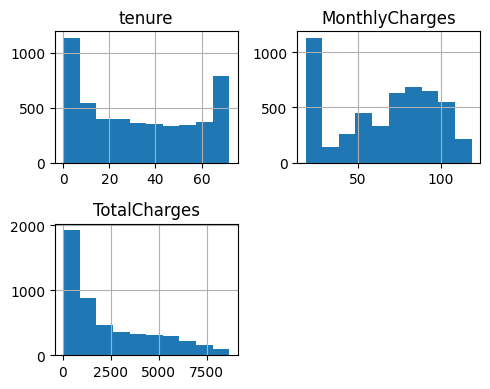

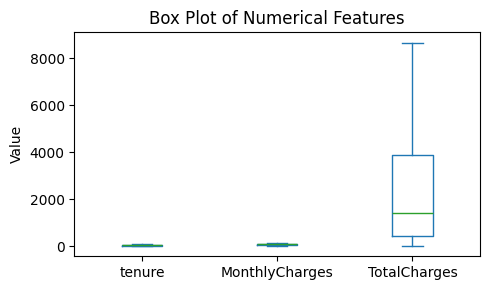

In [25]:




df = pd.DataFrame(full_data)

# Plot histograms for numerical features
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
df[numerical_features].hist(figsize=(5, 4))
plt.tight_layout()
plt.show()

# Plot box plots for numerical features
df[numerical_features].plot(kind="box", figsize=(5, 3))
plt.title("Box Plot of Numerical Features")
plt.ylabel("Value")
plt.tight_layout()
plt.show()


##### 2.1 Exploration of categorical features 

In [26]:
# Explore categorical features using value_counts()
categorical_features = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", 
                        "MultipleLines", "InternetService", "OnlineSecurity", "DeviceProtection", 
                        "TechSupport", "StreamingTV", "StreamingMovies", "Contract", 
                        "PaperlessBilling", "PaymentMethod", "Churn"]

for feature in categorical_features:
    print(full_data[feature].value_counts())
    print( "="*20)


gender
Male      2559
Female    2484
Name: count, dtype: int64
SeniorCitizen
No     4224
Yes     819
Name: count, dtype: int64
Partner
No     2585
Yes    2458
Name: count, dtype: int64
Dependents
No     3482
Yes    1561
Name: count, dtype: int64
PhoneService
Yes    4554
No      489
Name: count, dtype: int64
MultipleLines
No     2913
Yes    2130
Name: count, dtype: int64
InternetService
Yes    3963
No     1080
Name: count, dtype: int64
OnlineSecurity
No     3587
Yes    1456
Name: count, dtype: int64
DeviceProtection
No     3299
Yes    1744
Name: count, dtype: int64
TechSupport
No     3552
Yes    1491
Name: count, dtype: int64
StreamingTV
No     3098
Yes    1945
Name: count, dtype: int64
StreamingMovies
Yes    2633
No     2410
Name: count, dtype: int64
Contract
Month-to-month    2744
Two year          1244
One year          1055
Name: count, dtype: int64
PaperlessBilling
Yes    2996
No     2047
Name: count, dtype: int64
PaymentMethod
Electronic check             1700
Mailed check        

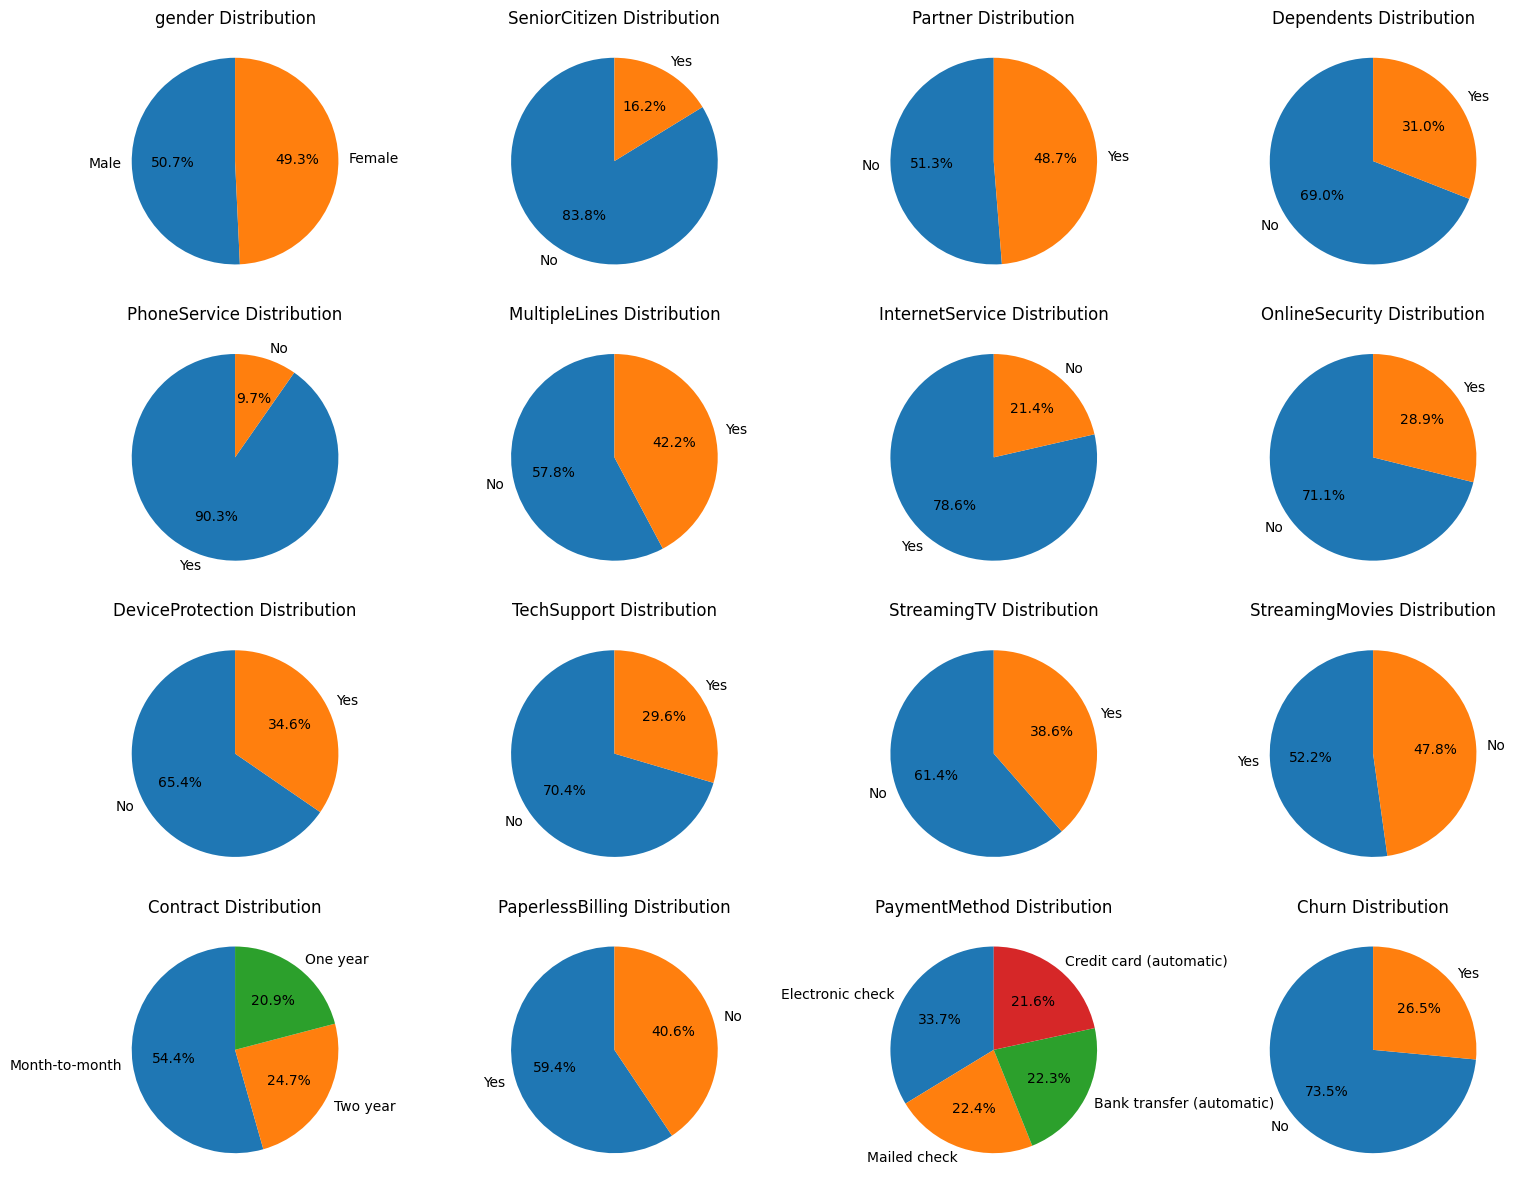

In [27]:


# Define categorical features
categorical_features = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", 
                        "MultipleLines", "InternetService", "OnlineSecurity", "DeviceProtection", 
                        "TechSupport", "StreamingTV", "StreamingMovies", "Contract", 
                        "PaperlessBilling", "PaymentMethod", "Churn"]

# Plot pie charts for categorical features
plt.figure(figsize=(15, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    feature_counts = df[feature].value_counts()
    plt.pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"{feature} Distribution")
plt.tight_layout()
plt.show()



##### 3.1 Understanding the relationship between different attributes and churn

We will use appropriate plots and charts to understand the relationship between different attributes and churn. Below are the visualizations for each question:

- Total Churn Rate:
Plot a pie chart showing the distribution of churn (True/False).

- Effect of Boolean Attributes on Churn:
Generate countplots for each boolean attribute (e.g., Partner, Dependents) based on churn status.

- Effect of Non-Boolean Attributes on Churn:
Generate countplots or bar plots for each non-boolean attribute (e.g., InternetService, Contract, PaymentMethod) based on churn status.

- Effect of Numerical Attributes on Churn:
Create box plots or histograms for numerical attributes (e.g., MonthlyCharges, TotalCharges) grouped by churn status.

- Effect of Tenure on Churn:
Plot a line chart or box plot showing the distribution of tenure for churned and non-churned customers.

- Effect of Internet Service Type on Churn:
Generate a countplot or pie chart showing the distribution of churn for each type of Internet service.

- Effect of Contract Type on Churn:
Create a countplot or pie chart displaying the distribution of churn for each type of contract.

- Effect of Payment Method on Churn:
Generate a countplot or pie chart showing the distribution of churn for each payment method.

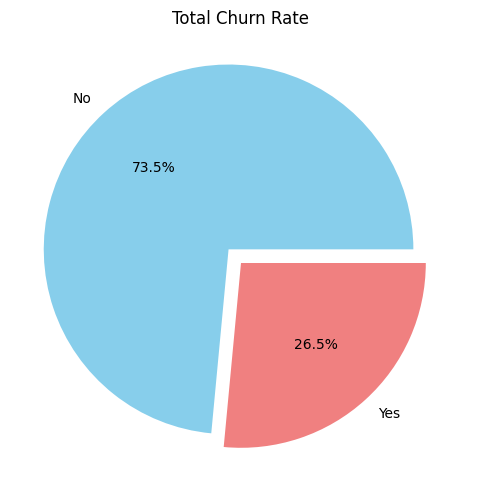

In [28]:
plt.figure(figsize=(6, 6))
explode = (0.1, 0)  # Explode the first wedge (Churn) by 0.1
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], explode=explode)
plt.title('Total Churn Rate')
plt.ylabel('')
plt.show()

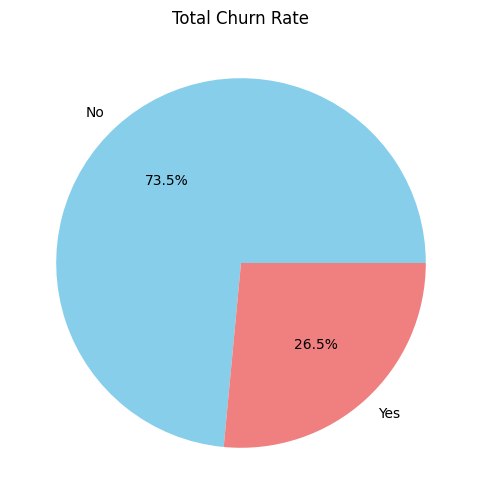

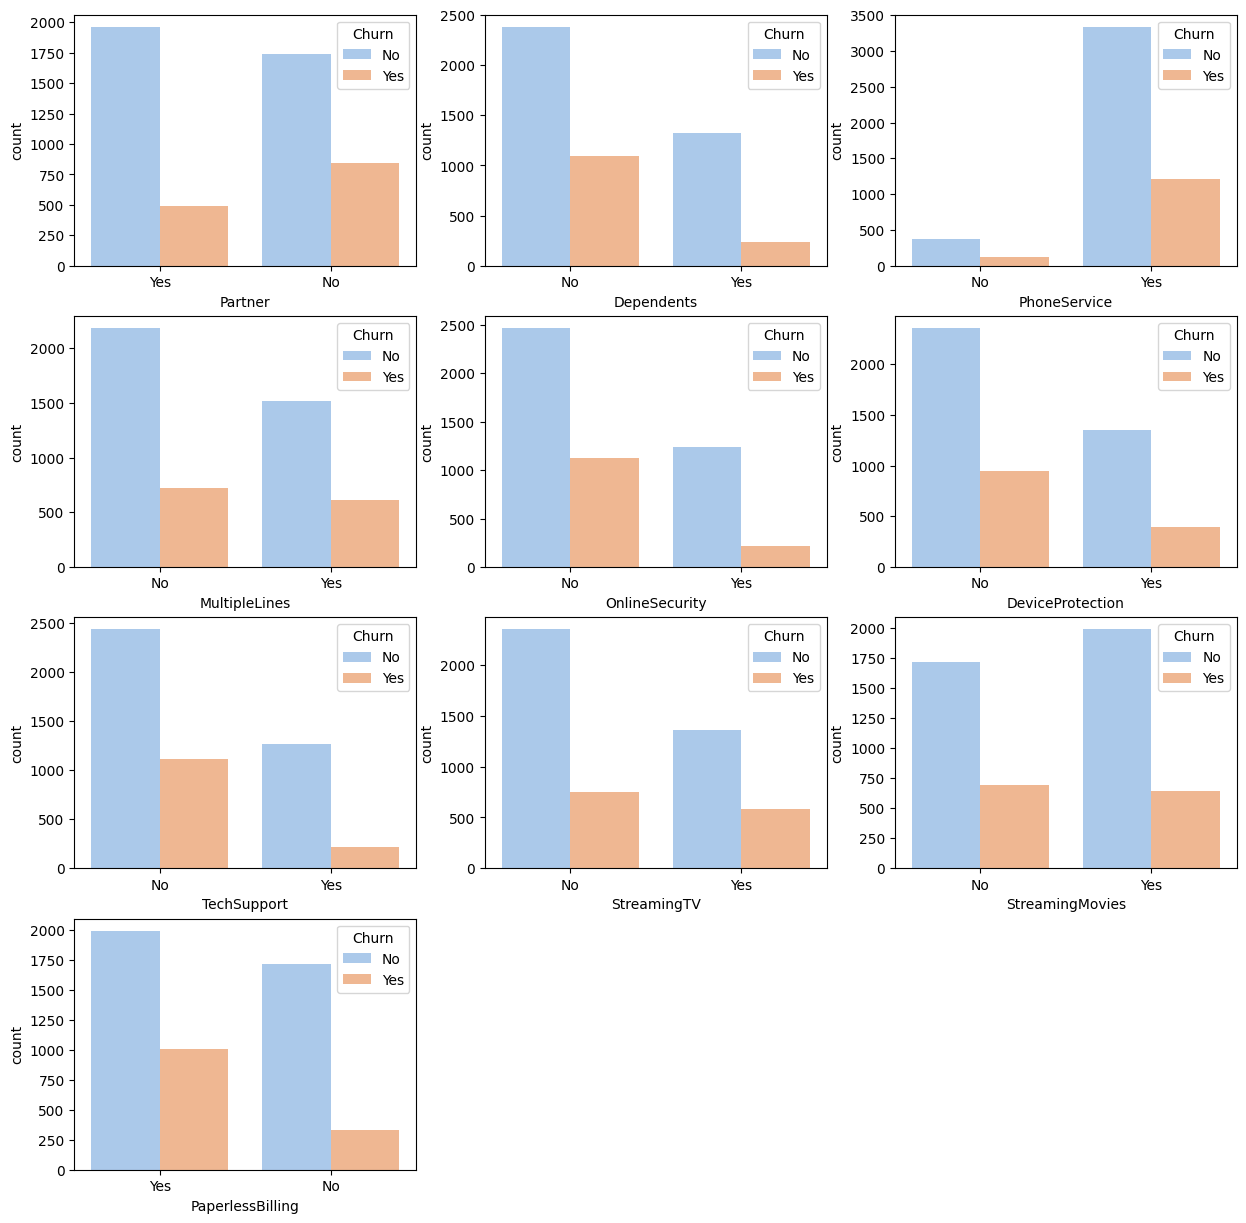

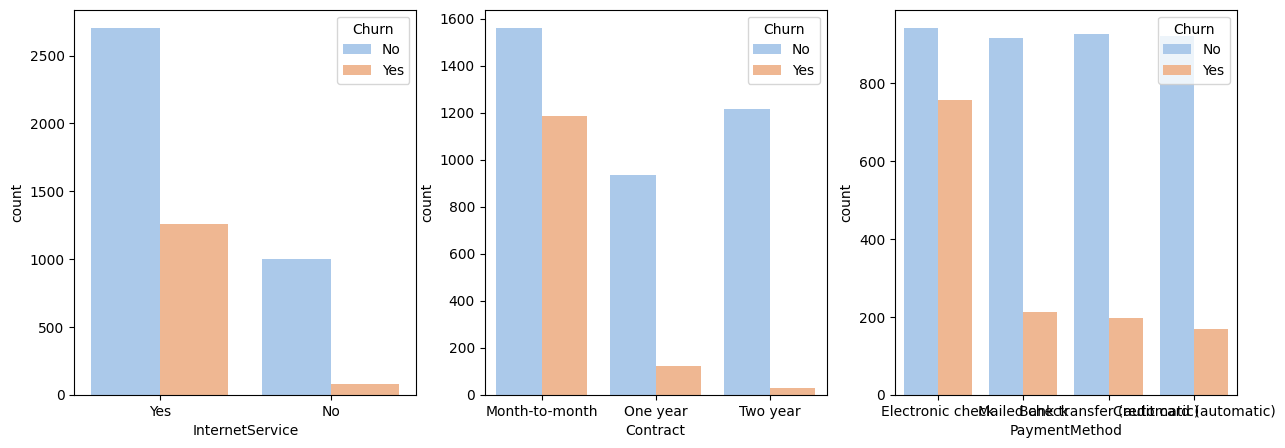

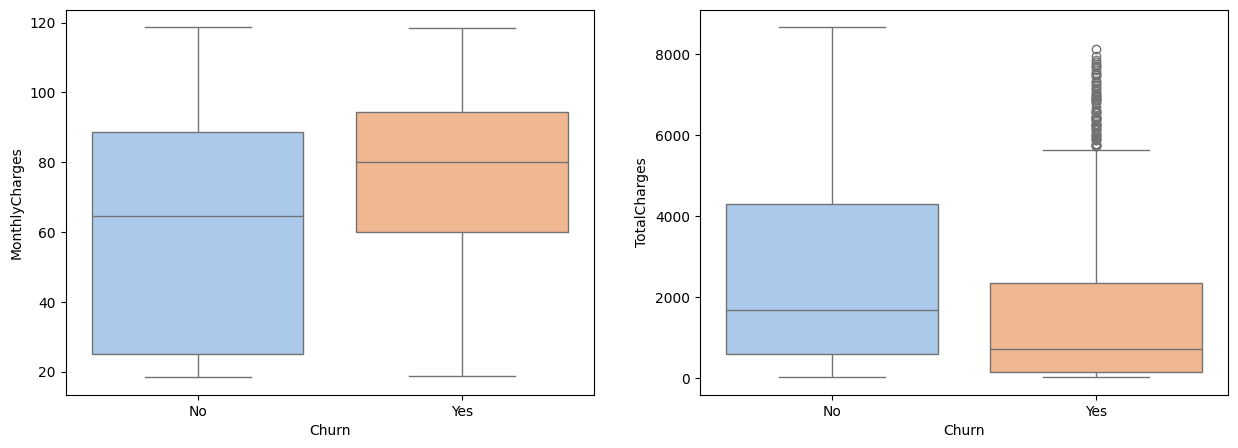

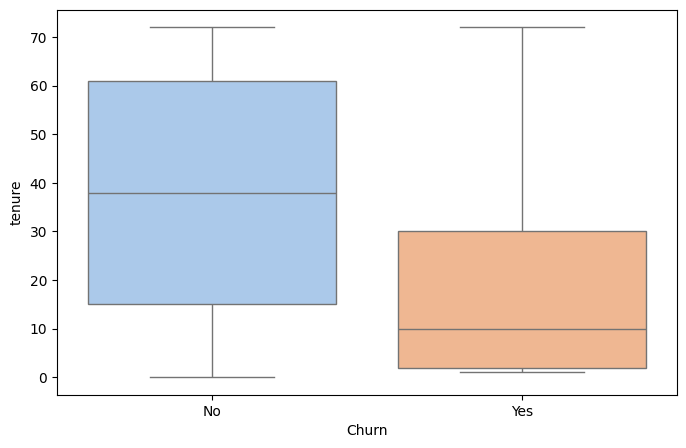

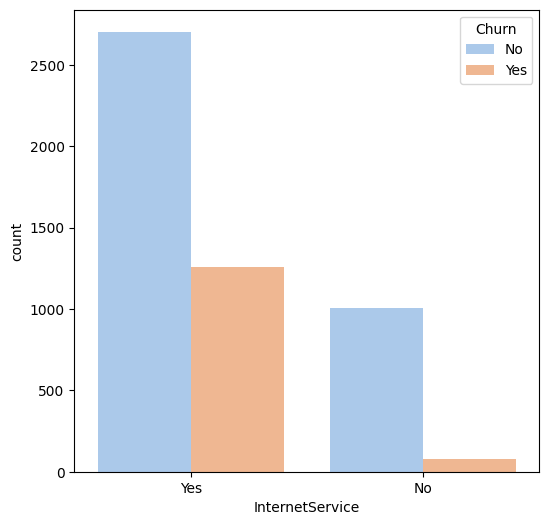

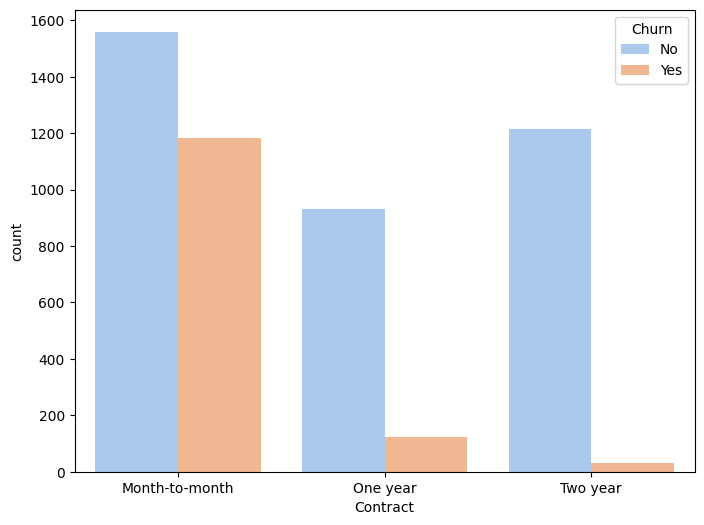

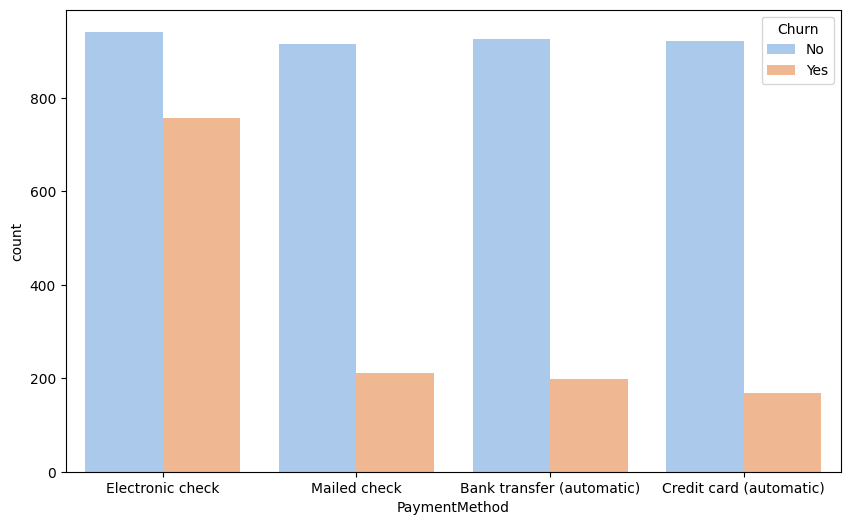

In [29]:


# 1. Total Churn Rate
plt.figure(figsize=(6, 6))
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Total Churn Rate')
plt.ylabel('')


# 2. Effect of Boolean Attributes on Churn
boolean_attributes = ["Partner", "Dependents", "PhoneService", "MultipleLines", 
                      "OnlineSecurity", "DeviceProtection", "TechSupport", 
                      "StreamingTV", "StreamingMovies", "PaperlessBilling"]
plt.figure(figsize=(15, 15))
for i, attribute in enumerate(boolean_attributes, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=df, x=attribute, hue='Churn', palette='pastel')
   

# 3. Effect of Non-Boolean Attributes on Churn
non_boolean_attributes = ["InternetService", "Contract", "PaymentMethod"]
plt.figure(figsize=(15, 5))
for i, attribute in enumerate(non_boolean_attributes, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=attribute, hue='Churn', palette='pastel')

# 4. Effect of Numerical Attributes on Churn
plt.figure(figsize=(15, 5))
for i, attribute in enumerate(["MonthlyCharges", "TotalCharges"], 1):
    plt.subplot(1, 2, i)
    sns.boxplot(data=df, x='Churn', y=attribute, palette='pastel')

# 5. Effect of Tenure on Churn
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='tenure', palette='pastel')

# 6. Effect of Internet Service Type on Churn
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='pastel')

# 7. Effect of Contract Type on Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='pastel')

# 8. Effect of Payment Method on Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='pastel')

plt.show()


<Axes: >

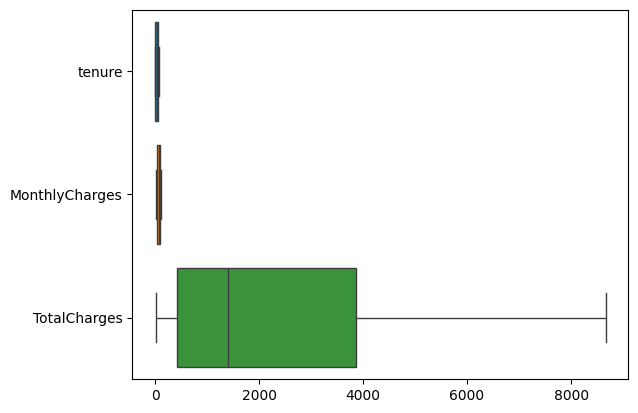

In [30]:
sns.boxplot(full_data, orient = 'h')

#### Drop MonthlyIncome and tenure

<Axes: >

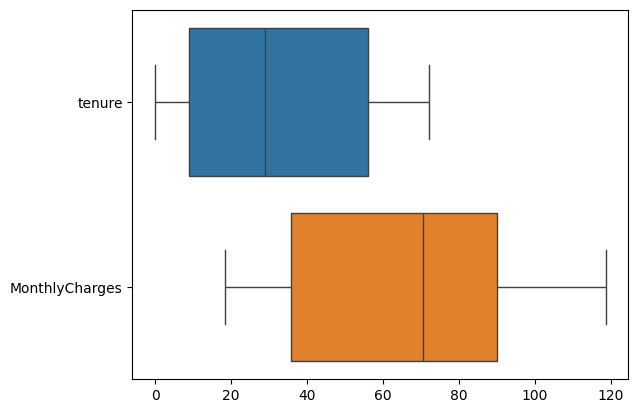

In [31]:
sns.boxplot(full_data.drop(['TotalCharges'],axis = 1), orient = 'h')

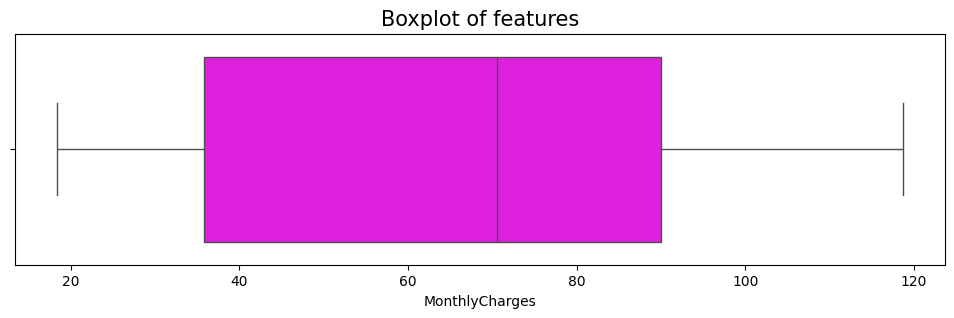

In [32]:
plt.figure(figsize = (12,3))
sns.boxplot(full_data['MonthlyCharges'], orient = 'h',color ='magenta')
plt.title('Boxplot of features',fontsize = 15)
plt.show()

In [33]:
#Show skewness
full_data.select_dtypes(include=['float']).skew()




MonthlyCharges   -0.238767
TotalCharges      0.945130
dtype: float64

### Visualizations for the skewness for both monthly charges and total charges

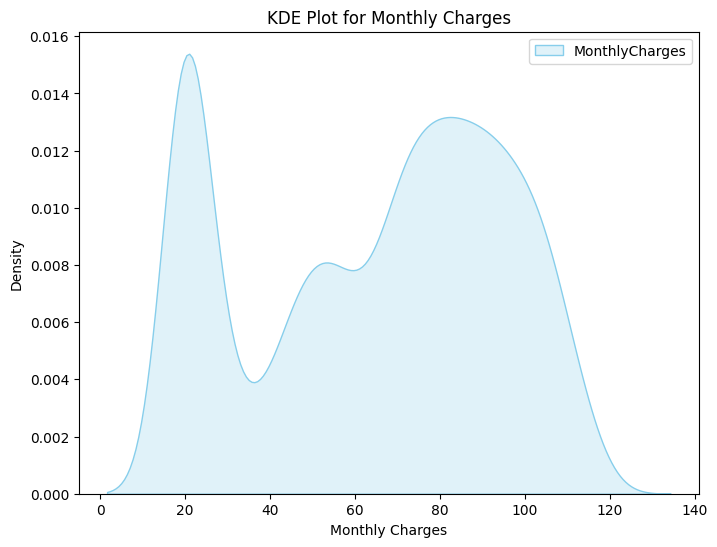

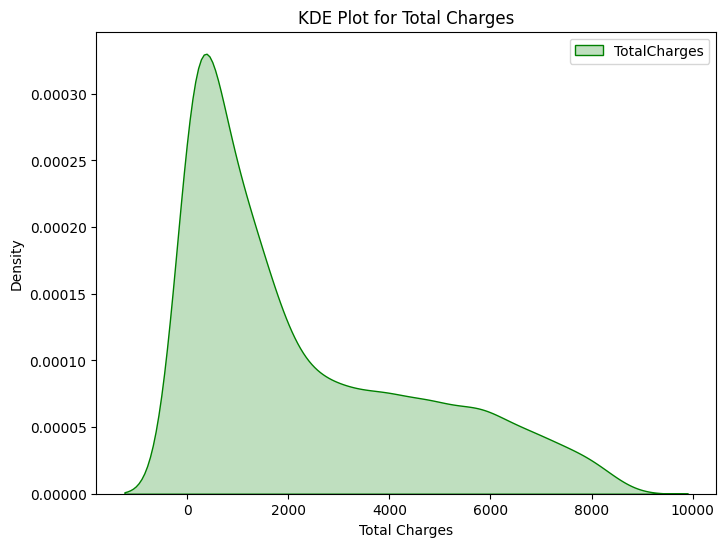

In [161]:
# Plotting MonthlyCharges
plt.figure(figsize=(8, 6))
sns.kdeplot(data=full_data['MonthlyCharges'], fill=True, color='skyblue', label='MonthlyCharges')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.title('KDE Plot for Monthly Charges')
plt.legend()
plt.show()

# Plotting TotalCharges
plt.figure(figsize=(8, 6))
sns.kdeplot(data=full_data['TotalCharges'], fill=True, color='green', label='TotalCharges')
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.title('KDE Plot for Total Charges')
plt.legend()
plt.show()





In [35]:
#Show skewness
skew = full_data.select_dtypes(include=['float']).skew().sum()
print(f'The skewnes of the numerical features in the dataset is {round(skew, 2)}')

The skewnes of the numerical features in the dataset is 0.71


In [36]:
# Assuming 'full_data' is your DataFrame containing the columns 'MonthlyCharges' and 'TotalCharges'
correlation = full_data[['MonthlyCharges', 'TotalCharges','tenure']].corr()
correlation


,MonthlyCharges,TotalCharges,tenure
MonthlyCharges,1.000000,0.646993,0.240645
TotalCharges,0.646993,1.000000,0.826451
tenure,0.240645,0.826451,1.000000


### Visualization for correlation heatmap

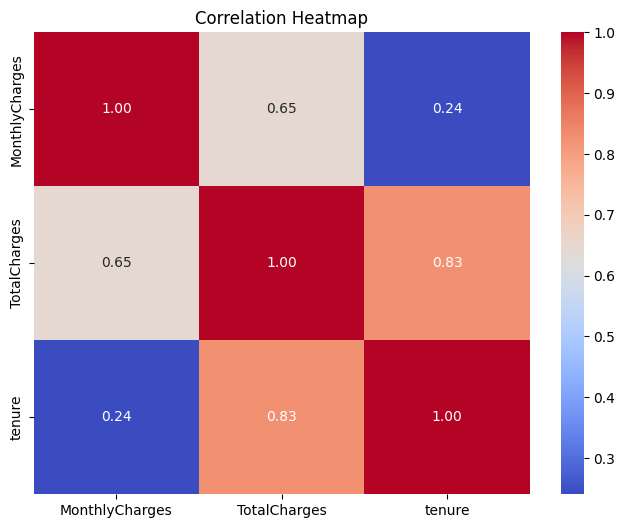

In [37]:
# Plotting correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


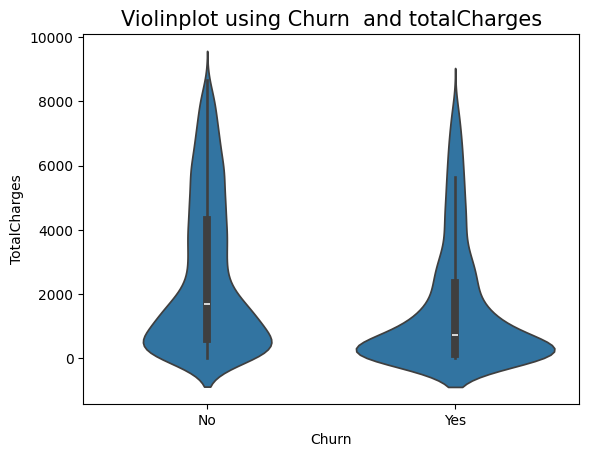

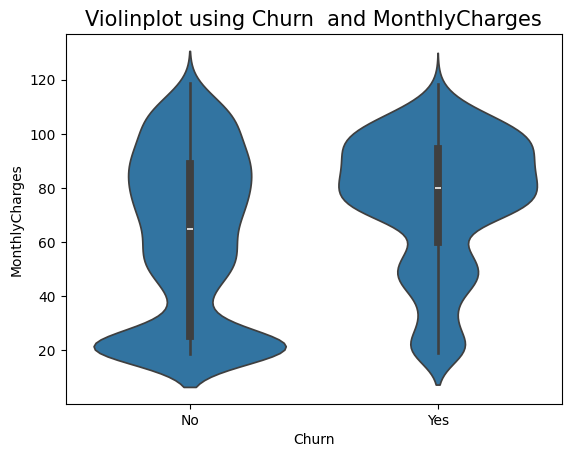

In [38]:
sns.violinplot(data = full_data,x = 'Churn',y = 'TotalCharges')
plt.title('Violinplot using Churn  and totalCharges', fontsize = 15)
plt.show()

sns.violinplot(data = full_data,x = 'Churn',y = 'MonthlyCharges')
plt.title('Violinplot using Churn  and MonthlyCharges', fontsize = 15)
plt.show()

### Multiveriate Analysis
 1.  Which gender had the higest churn


In [39]:
#Grouping churn counts by gender and churn status
grouped_churn = full_data.groupby('gender')['Churn'].value_counts().rename('Breakdown').reset_index()
grouped_churn


,gender,Churn,Breakdown
0,Female,No,1823
1,Female,Yes,661
2,Male,No,1884
3,Male,Yes,675


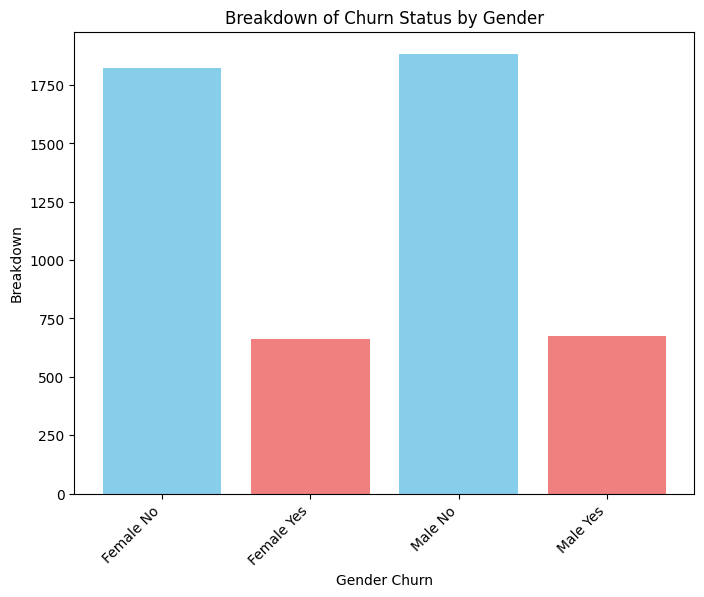

In [40]:


# Data
gender = ['Female No', 'Female Yes', 'Male No', 'Male Yes']
breakdown = [1823, 661, 1884, 675]

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(gender, breakdown, color=['skyblue', 'lightcoral', 'skyblue', 'lightcoral'])
plt.xlabel('Gender Churn')
plt.ylabel('Breakdown')
plt.title('Breakdown of Churn Status by Gender')
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()


In [41]:
grouped_churn['Ratio'] = grouped_churn.groupby('gender')['Breakdown'].transform(lambda x: x/ x.sum() *100)
grouped_churn

,gender,Churn,Breakdown,Ratio
0,Female,No,1823,73.389694
1,Female,Yes,661,26.610306
2,Male,No,1884,73.622509
3,Male,Yes,675,26.377491


### Hypothesis testing

In [42]:


# Assuming 'full_data' is your DataFrame containing 'MonthlyCharges' and 'Churn' columns
# Extract MonthlyCharges and Churn columns
monthly_charges = full_data['MonthlyCharges']
churn = full_data['Churn']

# Encode 'Churn' column to numerical format
label_encoder = LabelEncoder()
churn_encoded = label_encoder.fit_transform(churn)

# Calculate Pearson correlation coefficient and p-value
correlation_coef, p_value = stats.pearsonr(monthly_charges, churn_encoded)

# Print correlation coefficient and p-value
print("Pearson Correlation Coefficient:", correlation_coef)
print("P-value:", p_value)

# Define significance level (alpha)
alpha = 0.05

# Check if p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant correlation between MonthlyCharges and customer churn.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant correlation between MonthlyCharges and customer churn.")


Pearson Correlation Coefficient: 0.20208910644737813
P-value: 1.2575465113528094e-47
Reject the null hypothesis. There is a statistically significant correlation between MonthlyCharges and customer churn.


### Summary of Findings for the Hypothesis
The analysis indicates a statistically significant correlation between MonthlyCharges and customer churn. Therefore, we reject the null hypothesis, suggesting that there is indeed a relationship between MonthlyCharges and customer churn.

### Data Preperation

- Check if dataset is balanced

In [43]:
full_data['InternetService'].unique()

array(['Yes', 'No'], dtype=object)

In [44]:
full_data['OnlineBackup'].unique()

array([True, False, 'No', 'Yes', 'No internet service'], dtype=object)

In [45]:
# Drop the 'customerID' column from the DataFrame becausing during the training stage encoding the column is challenging
full_data = full_data.drop('customerID', axis=1)
 
# Display the DataFrame after dropping the column
print("\nDataFrame after dropping the 'customerID' column:")
full_data.head()


DataFrame after dropping the 'customerID' column:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,Yes,No,True,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,No,No,No,34,Yes,No,Yes,Yes,False,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,No,No,No,2,Yes,No,Yes,Yes,True,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,No,No,No,45,No,No,Yes,Yes,False,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,No,No,No,2,Yes,No,Yes,No,False,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [46]:
full_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,Yes,No,True,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,No,No,No,34,Yes,No,Yes,Yes,False,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,No,No,No,2,Yes,No,Yes,Yes,True,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,No,No,No,45,No,No,Yes,Yes,False,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,No,No,No,2,Yes,No,Yes,No,False,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [47]:





# Create DataFrame
df = pd.DataFrame(full_data)

# Encode categorical variables
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1})
df['SeniorCitizen'] = df['SeniorCitizen'].map({'No': 0, 'Yes': 1})
df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})
df['MultipleLines'] = df['MultipleLines'].map({'No': 0, 'Yes': 1})
df['InternetService'] = df['InternetService'].map({'No': 0, 'Yes': 1})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'No': 0, 'Yes': 1})
df['OnlineBackup'] = df['OnlineBackup'].map({False: 0, 'No': 0, True: 1, 'Yes': 1, 'No internet service': 2})
df['DeviceProtection'] = df['DeviceProtection'].map({'No': 0, 'Yes': 1})
df['TechSupport'] = df['TechSupport'].map({'No': 0, 'Yes': 1})
df['StreamingTV'] = df['StreamingTV'].map({'No': 0, 'Yes': 1})
df['StreamingMovies'] = df['StreamingMovies'].map({'No': 0, 'Yes': 1})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'No': 0, 'Yes': 1})
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Encode Contract and PaymentMethod using one-hot encoding
df = pd.get_dummies(df, columns=['Contract', 'PaymentMethod'])

# Print encoded DataFrame
df.head()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,29.850000,29.850000,0,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,1,0,...,56.950001,1889.500000,0,False,True,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,1,...,53.849998,108.150002,1,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,1,0,...,42.299999,1840.750000,0,False,True,False,True,False,False,False
4,0,0,0,0,2,1,0,1,0,0,...,70.699997,151.649994,1,True,False,False,False,False,True,False


In [48]:

import pandas as pd
import numpy as np

# Assuming df is the DataFrame you want to convert

# Replace non-finite values with appropriate values (e.g., replace NaN with 0)
df.fillna(0, inplace=True)

# Convert boolean values to 1 and 0
df = df.astype(int)

# Print the DataFrame with boolean values converted to 1 and 0
df



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,29,29,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,56,1889,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,53,108,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,...,42,1840,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,1,0,0,...,70,151,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1,0,1,1,24,1,1,1,1,0,...,84,1990,0,0,1,0,0,0,0,1
5039,0,0,1,1,72,1,1,1,0,1,...,103,7362,0,0,1,0,0,1,0,0
5040,0,0,1,1,11,0,0,1,1,0,...,29,346,0,1,0,0,0,0,1,0
5041,1,1,1,0,4,1,1,1,0,0,...,74,306,1,1,0,0,0,0,0,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   gender                                   5043 non-null   int32
 1   SeniorCitizen                            5043 non-null   int32
 2   Partner                                  5043 non-null   int32
 3   Dependents                               5043 non-null   int32
 4   tenure                                   5043 non-null   int32
 5   PhoneService                             5043 non-null   int32
 6   MultipleLines                            5043 non-null   int32
 7   InternetService                          5043 non-null   int32
 8   OnlineSecurity                           5043 non-null   int32
 9   OnlineBackup                             5043 non-null   int32
 10  DeviceProtection                         5043 non-null   int32
 11  Tech

In [50]:
df.isna().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
InternetService                            0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMet

In [51]:
#store df values in full_data
full_data = df
full_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,29,29,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,56,1889,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,53,108,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,...,42,1840,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,1,0,0,...,70,151,1,1,0,0,0,0,1,0


In [52]:
class_distro = full_data['Churn'].value_counts().rename('Total').reset_index()
class_distro

,Churn,Total
0,0,3707
1,1,1336


In [53]:
class_distro['Ratio'] = class_distro['Total'].apply(lambda x: round((x/class_distro['Total'].sum()) * 100, 2))
class_distro

,Churn,Total,Ratio
0,0,3707,73.51
1,1,1336,26.49


### **Split Dataset into Training and Evaluation**

- X = input_data
- y = Label

In [54]:
full_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,29,29,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,56,1889,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,53,108,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,...,42,1840,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,1,0,0,...,70,151,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1,0,1,1,24,1,1,1,1,0,...,84,1990,0,0,1,0,0,0,0,1
5039,0,0,1,1,72,1,1,1,0,1,...,103,7362,0,0,1,0,0,1,0,0
5040,0,0,1,1,11,0,0,1,1,0,...,29,346,0,1,0,0,0,0,1,0
5041,1,1,1,0,4,1,1,1,0,0,...,74,306,1,1,0,0,0,0,0,1


In [55]:
X = full_data.drop('Churn',axis = 1)
y = full_data['Churn']

In [56]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,1,29,29,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,0,56,1889,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,1,53,108,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,...,0,42,1840,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,1,0,0,...,1,70,151,1,0,0,0,0,1,0


In [57]:


# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [58]:
encoder  = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)




In [59]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1046,0,0,0,0,52,1,1,1,1,0,...,0,74,3877,0,1,0,0,1,0,0
2727,1,0,0,0,5,1,1,1,0,0,...,1,94,462,1,0,0,1,0,0,0
3139,1,0,1,1,50,1,1,0,0,2,...,0,24,1261,0,0,1,0,0,0,1
30,0,1,1,0,71,1,1,1,1,1,...,1,96,6766,0,0,1,0,1,0,0
725,1,1,1,0,9,1,0,0,0,0,...,1,21,204,1,0,0,0,0,0,1


In [60]:
y_train.head()

1046    0
2727    1
3139    0
30      0
725     0
Name: Churn, dtype: int32

### Prepare pipelines

In [61]:
non_numerical_columns = object_columns
non_numerical_columns 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')

In [62]:
numerical_columns = X.select_dtypes('number').columns
numerical_columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [63]:


# Assuming 'x' is your DataFrame containing numerical columns
stand_scaler = StandardScaler()
stand_scaled = stand_scaler.fit_transform(X.select_dtypes(include='number'))
stand_scaled_df = pd.DataFrame(stand_scaled, columns=X.select_dtypes(include='number').columns)
stand_scaled_df.describe().T


,count,mean,std,min,25%,50%,75%,max
gender,5043.0,-7.537981e-17,1.000099,-1.014984,-1.014984,0.985237,0.985237,0.985237
SeniorCitizen,5043.0,-3.170179e-17,1.000099,-0.440332,-0.440332,-0.440332,-0.440332,2.271015
Partner,5043.0,1.331475e-16,1.000099,-0.975126,-0.975126,-0.975126,1.025509,1.025509
Dependents,5043.0,5.706322e-17,1.000099,-0.669556,-0.669556,-0.669556,1.493526,1.493526
tenure,5043.0,-3.522421e-18,1.000099,-1.328175,-0.961238,-0.145822,0.954988,1.607321
PhoneService,5043.0,1.972556e-17,1.000099,-3.051702,0.327686,0.327686,0.327686,0.327686
MultipleLines,5043.0,2.254349e-17,1.000099,-0.855105,-0.855105,-0.855105,1.169447,1.169447
InternetService,5043.0,8.946949e-17,1.000099,-1.915579,0.522035,0.522035,0.522035,0.522035
OnlineSecurity,5043.0,-1.408968e-17,1.000099,-0.637111,-0.637111,-0.637111,1.569586,1.569586
OnlineBackup,5043.0,4.508699e-17,1.000099,-0.792521,-0.792521,-0.792521,0.750600,2.293721


<Axes: ylabel='Density'>

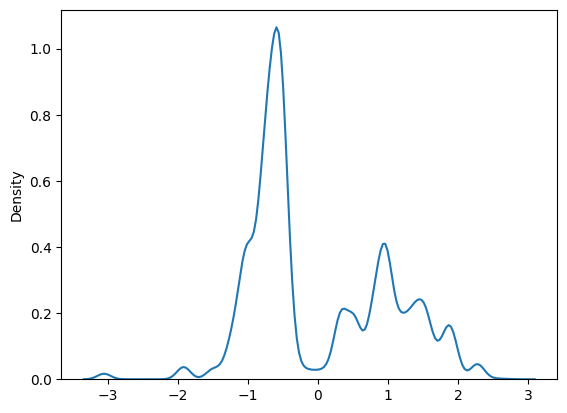

In [64]:
sns.kdeplot(stand_scaled_df.values.ravel())

In [65]:


# Assuming 'x' is your DataFrame containing numerical columns
robust_scaler = RobustScaler()
r_scaled = robust_scaler.fit_transform(X.select_dtypes(include='number'))
r_scaled_df = pd.DataFrame(r_scaled, columns=X.select_dtypes(include='number').columns)
r_scaled_df.describe().T


,count,mean,std,min,25%,50%,75%,max
gender,5043.0,-0.492564,0.499994,-1.000000,-1.000000,0.0,0.000000,0.000000
SeniorCitizen,5043.0,0.162403,0.368857,0.000000,0.000000,0.0,0.000000,1.000000
Partner,5043.0,0.487408,0.499891,0.000000,0.000000,0.0,1.000000,1.000000
Dependents,5043.0,0.309538,0.462349,0.000000,0.000000,0.0,1.000000,1.000000
tenure,5043.0,0.076099,0.521911,-0.617021,-0.425532,0.0,0.574468,0.914894
PhoneService,5043.0,-0.096966,0.295941,-1.000000,0.000000,0.0,0.000000,0.000000
MultipleLines,5043.0,0.422368,0.493985,0.000000,0.000000,0.0,1.000000,1.000000
InternetService,5043.0,-0.214158,0.410278,-1.000000,0.000000,0.0,0.000000,0.000000
OnlineSecurity,5043.0,0.288717,0.453211,0.000000,0.000000,0.0,1.000000,1.000000
OnlineBackup,5043.0,0.513583,0.648102,0.000000,0.000000,0.0,1.000000,2.000000


<Axes: ylabel='Density'>

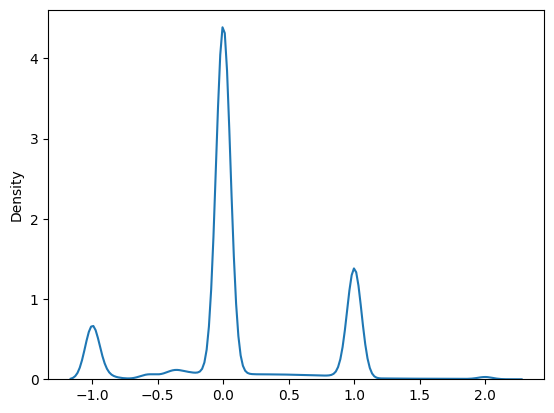

In [66]:
sns.kdeplot(r_scaled_df.values.ravel())

In [67]:


# Assuming 'x' is your DataFrame containing numerical columns
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(X.select_dtypes(include='number'))
minmax_scaled_df = pd.DataFrame(minmax_scaled, columns=X.select_dtypes(include='number').columns)
minmax_scaled_df.describe().T


,count,mean,std,min,25%,50%,75%,max
gender,5043.0,0.507436,0.499994,0.0,0.000000,1.000000,1.000000,1.0
SeniorCitizen,5043.0,0.162403,0.368857,0.0,0.000000,0.000000,0.000000,1.0
Partner,5043.0,0.487408,0.499891,0.0,0.000000,0.000000,1.000000,1.0
Dependents,5043.0,0.309538,0.462349,0.0,0.000000,0.000000,1.000000,1.0
tenure,5043.0,0.452453,0.340692,0.0,0.125000,0.402778,0.777778,1.0
PhoneService,5043.0,0.903034,0.295941,0.0,1.000000,1.000000,1.000000,1.0
MultipleLines,5043.0,0.422368,0.493985,0.0,0.000000,0.000000,1.000000,1.0
InternetService,5043.0,0.785842,0.410278,0.0,1.000000,1.000000,1.000000,1.0
OnlineSecurity,5043.0,0.288717,0.453211,0.0,0.000000,0.000000,1.000000,1.0
OnlineBackup,5043.0,0.256792,0.324051,0.0,0.000000,0.000000,0.500000,1.0


<Axes: ylabel='Density'>

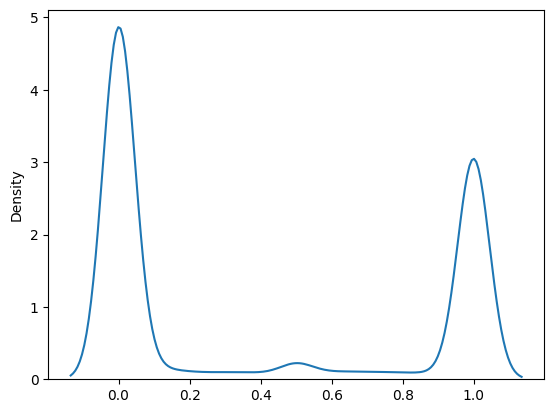

In [68]:
sns.kdeplot(minmax_scaled_df.values.ravel())

In [69]:

numeric_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
])

categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

preprocesor = ColumnTransformer(transformers=[
    ('num_pipeline', numeric_pipeline, numerical_columns),
    ('cat_pipeline', categorical_pipeline, categorical_columns)
])



## Modelling

In [70]:

models = [
    ('Decsion_Tree',DecisionTreeClassifier(random_state = 42)),
    ('Logistic Regression', LogisticRegression(random_state = 42)),
    ('KNN', KNeighborsClassifier(n_neighbors = 5)),
    ('Random Forest', RandomForestClassifier(random_state = 42))
]

In [71]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1046,0,0,0,0,52,1,1,1,1,0,...,0,74,3877,0,1,0,0,1,0,0
2727,1,0,0,0,5,1,1,1,0,0,...,1,94,462,1,0,0,1,0,0,0
3139,1,0,1,1,50,1,1,0,0,2,...,0,24,1261,0,0,1,0,0,0,1
30,0,1,1,0,71,1,1,1,1,1,...,1,96,6766,0,0,1,0,1,0,0
725,1,1,1,0,9,1,0,0,0,0,...,1,21,204,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0,0,0,0,41,1,0,1,0,0,...,0,50,2029,0,1,0,1,0,0,0
466,1,1,1,0,64,1,1,1,0,0,...,0,102,6538,0,0,1,0,0,1,0
3092,0,0,1,1,7,1,0,0,0,2,...,0,20,150,1,0,0,0,0,0,1
3772,1,0,1,1,69,1,1,1,0,1,...,1,81,5601,0,0,1,1,0,0,0


In [72]:
y_train

1046    0
2727    1
3139    0
30      0
725     0
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: Churn, Length: 3530, dtype: int32

In [73]:
y_train_encoded

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
y_train_encoded

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
models

[('Decsion_Tree', DecisionTreeClassifier(random_state=42)),
 ('Logistic Regression', LogisticRegression(random_state=42)),
 ('KNN', KNeighborsClassifier()),
 ('Random Forest', RandomForestClassifier(random_state=42))]

In [76]:

all_pipelines = {}
# Define the pipeline without including the target variable 'Churn'
for model_name, classifier in models:
    final_pipeline = Pipeline(steps=[
       
        ('classifier', classifier)
    ])
    # Fit the pipeline to the training data
    final_pipeline.fit(X_train, y_train_encoded)
    # Store the trained pipeline in the all_pipelines dictionary
    all_pipelines[model_name] = final_pipeline


#### Key Insights
The entire dataset has a positive skewness with a right tail of 0.72
Both TotalCharges and MonthlyCharges increases with increase in tenure
TotalCharges is significantly a dominant feature affecting churn

### **Checking Data Imbalance**

Proportion of Churned Customers: 0.26492167360698
Proportion of Not Churned Customers: 0.7350783263930201


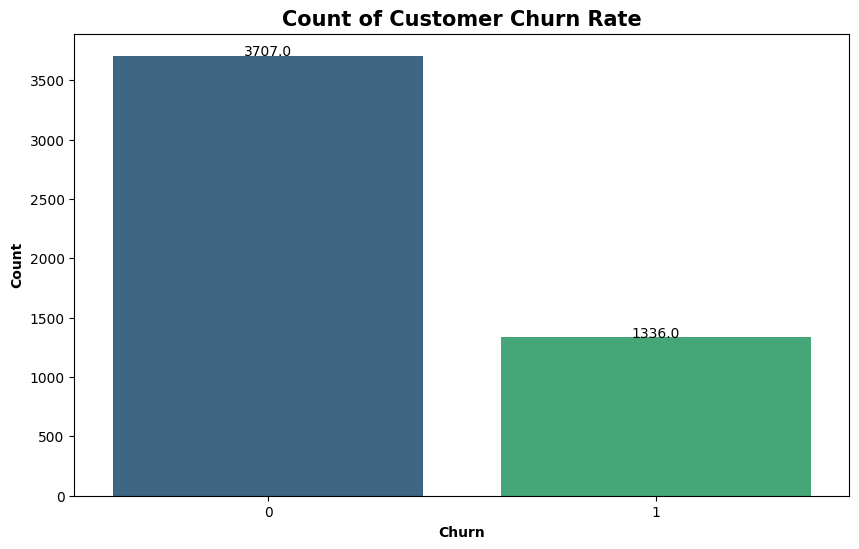

In [77]:
#check for class imbalance
plt.figure(figsize=(10,6))
ch= sns.countplot(data=df,x="Churn",palette='viridis') 
ch.set_title('Count of Customer Churn Rate',fontsize=15,fontweight='bold')
ch.set_xlabel('Churn',fontsize=10,fontweight='bold')
ch.set_ylabel('Count',fontsize=10,fontweight='bold')
for p in ch.patches:
    height = p.get_height()
    ch.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
    
# calculate proportion of churn categories
#churn_prop = churn_counts / len(df)
#print('Churn class proportions:')
#print(churn_prop)

# Calculate proportion of churn categories
churn_counts = df["Churn"].value_counts()
proportions = churn_counts / len(df)

# Display proportions
print("Proportion of Churned Customers:", proportions[1])
print("Proportion of Not Churned Customers:", proportions[0])

Data is imbalance as less people tend to churn (27%) compared to the number that does not churn (73%

### **Balancing Dataset**

In [78]:


# Instantiate RandomOverSampler
ros = RandomOverSampler(random_state=0)

# Resample the data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Convert X_rus and y_rus to a pandas DataFrame
df_ros = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)


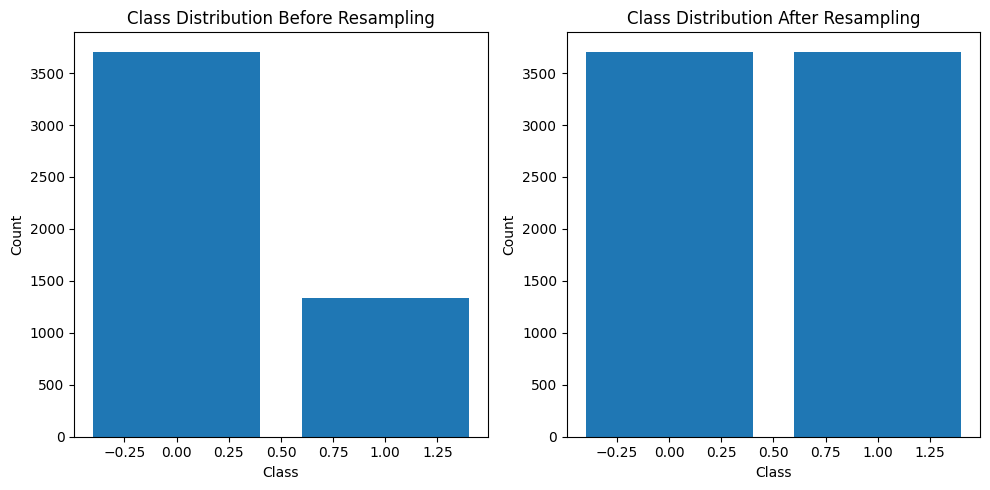

In [79]:
# Plot the target variable distribution before and after resampling
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].bar(y.value_counts().index, y.value_counts().values)
ax[0].set_title("Class Distribution Before Resampling")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Count")
ax[1].bar(y_resampled.value_counts().index, y_resampled.value_counts().values)
ax[1].set_title("Class Distribution After Resampling")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Count")
plt.tight_layout()
plt.show()

#### **Comment:**

The above chart now shows our data is balanced

In [80]:
# Checking shape of our balanced data
df_ros.shape

(7414, 25)

In [81]:
df_ros.Churn.value_counts()

Churn
0    3707
1    3707
Name: count, dtype: int64

In [82]:
# copy and re-assign df_ros to new_df
new_df = df_ros.copy()
df_ros = new_df

In [83]:
new_df.shape

(7414, 25)

### ***Impute Missing Values**

In [84]:
# Clean TotalCharges  and covert to float before imputing
new_df['TotalCharges'].replace({" " :np.nan}, inplace=True)
new_df['TotalCharges']=new_df['TotalCharges'].astype(float)

In [85]:
# Check for null values in data
null_rows = new_df.loc[new_df["TotalCharges"].isnull()]
null_rows.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn


### **Dataset Splitting**

In [86]:
target_df = new_df['Churn']
train_df = new_df.drop(columns = ['Churn'])

In [87]:
target_df.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [88]:
train_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,1,29,29.0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,0,56,1889.0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,1,53,108.0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,...,0,42,1840.0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,1,0,0,...,1,70,151.0,1,0,0,0,0,1,0


In [89]:
# Define X and y
X = train_df
y = target_df

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5189, 24), (2225, 24), (5189,), (2225,))

### **Features Encoding**

In [91]:

X_processed = X



### **Features Scaling**

In [92]:
# initialize MinMaxScaler object with specified parameters
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)

# select numerical columns to scale
num_cols = X_processed.select_dtypes(include='number').columns

# scale numerical columns using MinMaxScaler
X_processed[num_cols] = scaler.fit_transform(X_processed[num_cols])

In [93]:
X_processed.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.0,1.0,0.0,0.5,...,1.0,0.11,0.003345,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,1.0,1.0,0.0,...,0.0,0.38,0.217878,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,1.0,1.0,0.5,...,1.0,0.35,0.012457,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.0,1.0,1.0,0.0,...,0.0,0.24,0.212226,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,1.0,0.0,0.0,...,1.0,0.52,0.017416,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [94]:
X_processed.shape

(7414, 24)

### **Machine Learning Modeling**

Here is the section to build, train, evaluate and compare the models to each other.

In [95]:
#Split dataset on data after encoding and scaling

# Define X and y
X = X_processed
y = target_df

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [96]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5189, 24), (2225, 24), (5189,), (2225,))

### **1. Decision Tree model**

#### **Create the Model**

In [97]:
# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

#### **Train the Model**

In [98]:
# Fit a decision tree model using the training data
dt_model.fit(X_train, y_train)

# Use the fitted model to make predictions on the test data
dt_pred = dt_model.predict(X_test)

#### **Evaluate the Model on the Evaluation dataset (Evalset)**

In [99]:
# Calculate the accuracy, precision, recall, F1 score, and F2 score of the decision tree model
dt_acc = accuracy_score(y_test, dt_pred)
dt_prec = precision_score(y_test, dt_pred)
dt_rec = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
dt_f2 = fbeta_score(y_test, dt_pred, beta=2)

# Calculate the ROC curve of the decision tree model and the area under the curve (AUC)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_pred)
dt_auc = auc(dt_fpr, dt_tpr)

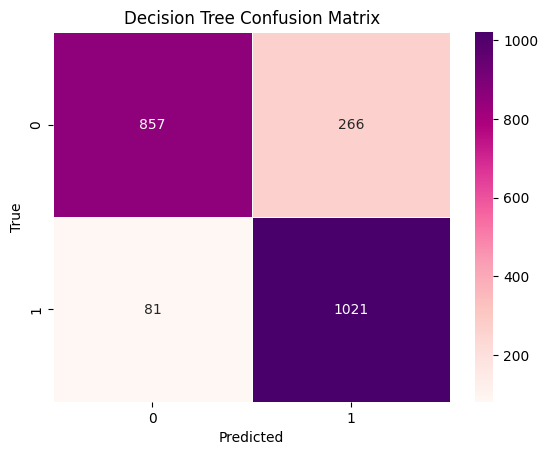

In [100]:
# Calculate the confusion matrix of the decision tree model
dt_cm = confusion_matrix(y_test, dt_pred)

# Plot the confusion matrix as a heatmap using Seaborn
sns.heatmap(dt_cm, annot=True, linewidth=0.5, fmt=".0f", cmap='RdPu')

plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [101]:
# Round the evaluation metrics to 3 decimal places
dt_acc = round(dt_acc, 3)
dt_prec = round(dt_prec, 3)
dt_rec = round(dt_rec, 3)
dt_f1 = round(dt_f1, 3)
dt_f2 = round(dt_f2, 3)
dt_auc = round(dt_auc, 3)


# Create a results table
dt_results_table = [
    ["Decision Tree", dt_acc, dt_prec, dt_rec, dt_f1, dt_f2, dt_auc],
]

# Define column headers
dt_headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score", "AUC"]

# Print the results table using tabulate
print(tabulate(dt_results_table, headers=dt_headers))

Model            Accuracy    Precision    Recall    F1 Score    F2 Score    AUC
-------------  ----------  -----------  --------  ----------  ----------  -----
Decision Tree       0.844        0.793     0.926       0.855       0.896  0.845


### **2. Gradient Boosting model**

#### **Create the Model**

In [102]:
# Create a Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

#### **Train the Model**

In [103]:
# Train the gradient boosting model on the training data
gb_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
gb_pred = gb_model.predict(X_test)

#### **Evaluate the Model on the Evaluation dataset (Evalset)**

In [104]:


# Compute the evaluation metrics for the gradient boosting model
gb_acc = accuracy_score(y_test, gb_pred)
gb_prec = precision_score(y_test, gb_pred)
gb_rec = recall_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)
gb_f2 = fbeta_score(y_test, gb_pred, beta=2)

# Compute the ROC curve and AUC score for the gradient boosting model
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_pred)
gb_auc = auc(gb_fpr, gb_tpr)




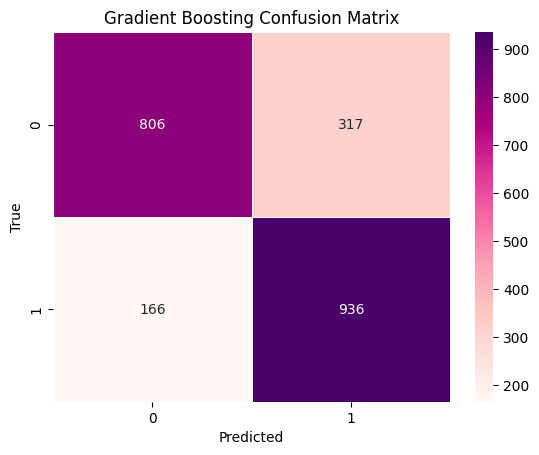

In [105]:
# Compute the confusion matrix for the gradient boosting model
gb_cm = confusion_matrix(y_test, gb_pred)

# Create a heatmap visualization of the confusion matrix using seaborn
sns.heatmap(gb_cm, annot=True, linewidth=0.5, fmt=".0f", cmap='RdPu')

# Add a title and axis labels to the heatmap
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

# Display the heatmap
plt.show()

In [106]:
# Round the evaluation metrics to 3 decimal places
gb_acc = round(gb_acc, 3)
gb_prec = round(gb_prec, 3)
gb_rec = round(gb_rec, 3)
gb_f1 = round(gb_f1, 3)
gb_f2 = round(gb_f2, 3)
gb_auc = round(gb_auc, 3)


# Create a results table
gb_results_table = [
    ["Gradient Boosting", gb_acc, gb_prec, gb_rec, gb_f1, gb_f2, gb_auc],
]

# Define column headers
gb_headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score", "AUC"]

# Print the results table using tabulate
print(tabulate(gb_results_table, headers=gb_headers))

Model                Accuracy    Precision    Recall    F1 Score    F2 Score    AUC
-----------------  ----------  -----------  --------  ----------  ----------  -----
Gradient Boosting       0.783        0.747     0.849       0.795       0.827  0.784


### **3. Logistic Regression**

#### **Create the Model**

In [107]:
# Create a Logistic Regression model
lr_model = LogisticRegression(random_state=42)

#### **Train the Model**

In [108]:
# Fit the logistic regression model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data using the fitted model
lr_pred = lr_model.predict(X_test)

#### **Evaluate the Model on the Evaluation dataset (Evalset)**

In [109]:
# Compute the valid metrics for the use case # Optional: show the classification report 
lr_acc = accuracy_score(y_test, lr_pred)  # calculate the accuracy score
lr_prec = precision_score(y_test, lr_pred)  # calculate the precision score
lr_rec = recall_score(y_test, lr_pred)  # calculate the recall score
lr_f1 = f1_score(y_test, lr_pred)  # calculate the F1 score
lr_f2 = fbeta_score(y_test, lr_pred, beta=2)  # calculate the F2 score (weighted towards recall)

# calculate the ROC curve
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_pred)  
lr_auc = auc(lr_fpr, lr_tpr)  # calculate the area under the ROC curve

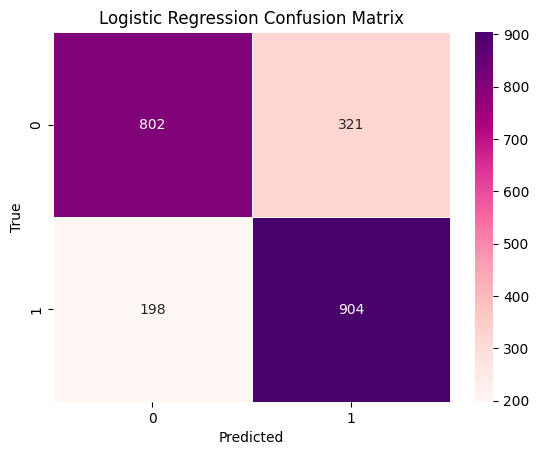

In [110]:
# Compute the confusion matrix for the logistic regression model
lr_cm = confusion_matrix(y_test, lr_pred)

# Create a heatmap visualization of the confusion matrix using seaborn
sns.heatmap(lr_cm, annot=True, linewidth=0.5, fmt=".0f", cmap='RdPu')

# Add a title and axis labels to the heatmap
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

# Display the heatmap
plt.show()

In [111]:
# Round the evaluation metrics to 3 decimal places
lr_acc = round(lr_acc, 3)
lr_prec = round(lr_prec, 3)
lr_rec = round(lr_rec, 3)
lr_f1 = round(lr_f1, 3)
lr_f2 = round(lr_f2, 3)
lr_auc = round(lr_auc, 3)


# Create a results table
lr_results_table = [
    ["Logistic Regression", lr_acc, lr_prec, lr_rec, lr_f1, lr_f2, lr_auc],
]

# Define column headers
lr_headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score", "AUC"]

# Print the results table using tabulate
print(tabulate(lr_results_table, headers=lr_headers))

Model                  Accuracy    Precision    Recall    F1 Score    F2 Score    AUC
-------------------  ----------  -----------  --------  ----------  ----------  -----
Logistic Regression       0.767        0.738      0.82       0.777       0.802  0.767


### **4. Stochastic Gradient Descent**

#### **Create the Model**

In [112]:
# Create a Stochastic Gradient Descent model
sgd_model = SGDClassifier(random_state=42)

#### **Train the Model**

In [113]:
# Train the model on the training data
sgd_model.fit(X_train, y_train)

# Use the trained model to predict on the test data
sgd_pred = sgd_model.predict(X_test)

#### **Evaluate the Model on the Evaluation dataset (Evalset)**

In [114]:
# Calculate performance metrics for the stochastic gradient descent model
sgd_acc = accuracy_score(y_test, sgd_pred)       # Accuracy score
sgd_prec = precision_score(y_test, sgd_pred)     # Precision score
sgd_rec = recall_score(y_test, sgd_pred)         # Recall score
sgd_f1 = f1_score(y_test, sgd_pred)              # F1 score
sgd_f2 = fbeta_score(y_test, sgd_pred, beta=2)   # F2 score with beta=2

# Calculate the false positive rate, true positive rate, and AUC for the ROC curve
sgd_fpr, sgd_tpr, _ = roc_curve(y_test, sgd_pred)
sgd_auc = auc(sgd_fpr, sgd_tpr)

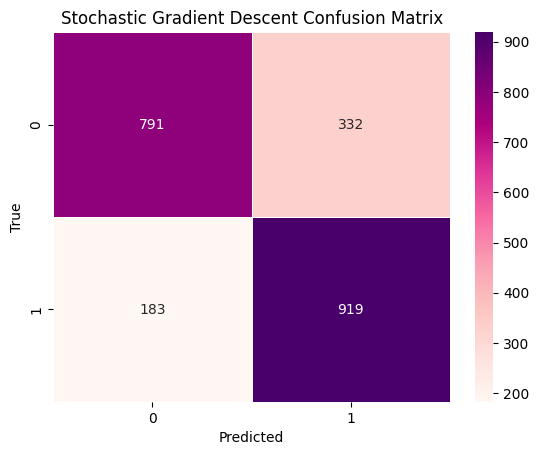

In [115]:
# Compute the confusion matrix for the stochastic gradient descent model
sgd_cm = confusion_matrix(y_test, sgd_pred)

# Create a heatmap visualization of the confusion matrix using seaborn
sns.heatmap(sgd_cm, annot=True, linewidth=0.5, fmt=".0f", cmap='RdPu')

# Add a title and axis labels to the heatmap
plt.title("Stochastic Gradient Descent Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

# Display the heatmap
plt.show()

In [116]:
# Round the evaluation metrics to 3 decimal places
sgd_acc = round(sgd_acc, 3)
sgd_prec = round(sgd_prec, 3)
sgd_rec = round(sgd_rec, 3)
sgd_f1 = round(sgd_f1, 3)
sgd_f2 = round(sgd_f2, 3)
sgd_auc = round(sgd_auc, 3)


# Create a results table
sgd_results_table = [
    ["Stochastic Gradient Descent", sgd_acc, sgd_prec, sgd_rec, sgd_f1, sgd_f2, sgd_auc],
]

# Define column headers
sgd_headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score", "AUC"]

# Print the results table using tabulate
print(tabulate(sgd_results_table, headers=sgd_headers))

Model                          Accuracy    Precision    Recall    F1 Score    F2 Score    AUC
---------------------------  ----------  -----------  --------  ----------  ----------  -----
Stochastic Gradient Descent       0.769        0.735     0.834       0.781       0.812  0.769


### **5. K-Nearest Neighbours**

#### **Create the Model**

In [117]:
# Create a K-Nearest Neighbours model
knn_model = KNeighborsClassifier()

#### **Train the Model**

In [118]:
# Train the model on the training data
knn_model.fit(X_train, y_train)

# Use the trained model to predict on the test data
knn_pred = knn_model.predict(X_test)

#### **Evaluate the Model on the Evaluation dataset (Evalset)**

In [119]:
# Calculate accuracy, precision, recall, f1 score, and f2 score
knn_acc = round(accuracy_score(y_test, knn_pred), 3)
knn_prec = round(precision_score(y_test, knn_pred), 3)
knn_rec = round(recall_score(y_test, knn_pred), 3)
knn_f1 = round(f1_score(y_test, knn_pred), 3)
knn_f2 = round(fbeta_score(y_test, knn_pred, beta=2), 3)

# Calculate the false positive rate, true positive rate, and AUC for the ROC curve
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_pred)
knn_auc = round(auc(knn_fpr, knn_tpr), 3)

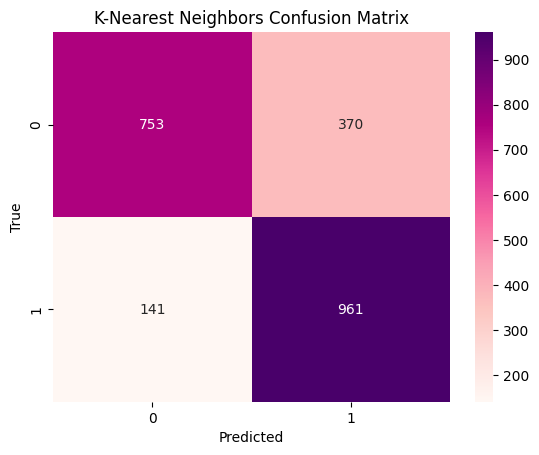

In [120]:
# Compute the confusion matrix for the K-Nearest Neighbours model
knn_cm = confusion_matrix(y_test, knn_pred)

# Create a heatmap visualization of the confusion matrix using seaborn
sns.heatmap(knn_cm, annot=True, fmt=".0f", cmap='RdPu')

plt.title("K-Nearest Neighbors Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [121]:
# Round the evaluation metrics to 3 decimal places
knn_acc = round(knn_acc, 3)
knn_prec = round(knn_prec, 3)
knn_rec = round(knn_rec, 3)
knn_f1 = round(knn_f1, 3)
knn_f2 = round(knn_f2, 3)
knn_auc = round(knn_auc, 3)


# K-Nearest Neighbours
knn_results_table = [
    ["K-Nearest Neighbours", knn_acc, knn_prec, knn_rec, knn_f1, knn_f2, knn_auc],
]

# Define column headers
knn_headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score", "AUC"]

# Print the K-Nearest Neighbours results table using tabulate
print(tabulate(knn_results_table, headers=knn_headers))

Model                   Accuracy    Precision    Recall    F1 Score    F2 Score    AUC
--------------------  ----------  -----------  --------  ----------  ----------  -----
K-Nearest Neighbours        0.77        0.722     0.872        0.79       0.837  0.771


### **6. Random Forest Model**

#### **Create the Model**

In [122]:
# Create a Random Forest model
rf_model = RandomForestClassifier()

#### **Train the Model**

In [123]:
# Train the model on the training data
rf_model.fit(X_train, y_train)

# Use the trained model to predict on the test data
rf_pred = rf_model.predict(X_test)

#### **Evaluate the Model on the Evaluation dataset (Evalset)**

In [124]:
# Calculate accuracy, precision, recall, f1 score, and f2 score
rf_acc = round(accuracy_score(y_test, rf_pred), 3)
rf_prec = round(precision_score(y_test, rf_pred), 3)
rf_rec = round(recall_score(y_test, rf_pred), 3)
rf_f1 = round(f1_score(y_test, rf_pred), 3)
rf_f2 = round(fbeta_score(y_test, rf_pred, beta=2), 3)

# Calculate the false positive rate, true positive rate, and AUC for the ROC curve
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pred)
rf_auc = round(auc(rf_fpr, rf_tpr), 3)

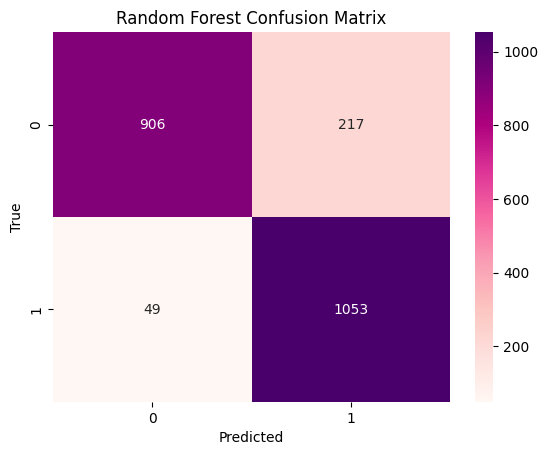

In [125]:
# compute the confusion matrix using true label values and predicted label values
rf_cm = confusion_matrix(y_test, rf_pred)

# plot the confusion matrix using seaborn heatmap with annotations and color map
sns.heatmap(rf_cm, annot=True, fmt=".0f", cmap='RdPu')


plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [126]:
# Round the evaluation metrics to 3 decimal places
rf_acc = round(rf_acc, 3)
rf_prec = round(rf_prec, 3)
rf_rec = round(rf_rec, 3)
rf_f1 = round(rf_f1, 3)
rf_f2 = round(rf_f2, 3)
rf_auc = round(rf_auc, 3)


# Random Forest Model
rf_results_table = [
    ["Random Forest Model", rf_acc, rf_prec, rf_rec, rf_f1, rf_f2, rf_auc],
]

# Define column headers
rf_headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score", "AUC"]

# Print the Random Forest Model results table using tabulate
print(tabulate(rf_results_table, headers=rf_headers))

Model                  Accuracy    Precision    Recall    F1 Score    F2 Score    AUC
-------------------  ----------  -----------  --------  ----------  ----------  -----
Random Forest Model        0.88        0.829     0.956       0.888       0.927  0.881


### **7. Support Vector machines**

#### **Create the Model**

In [127]:
# Create a Support Vector machines model
svm_model = SVC()

#### **Train the Model**

In [128]:
# Train the model on the training data
svm_model.fit(X_train, y_train)

# Use the trained model to predict on the test data
svm_pred = svm_model.predict(X_test)

#### **Evaluate the Model on the Evaluation dataset (Evalset)**

In [129]:
# Calculate accuracy, precision, recall, f1 score, and f2 score
svm_acc = round(accuracy_score(y_test, svm_pred), 3)
svm_prec = round(precision_score(y_test, svm_pred), 3)
svm_rec = round(recall_score(y_test, svm_pred), 3)
svm_f1 = round(f1_score(y_test, svm_pred), 3)
svm_f2 = round(fbeta_score(y_test, svm_pred, beta=2), 3)

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_pred)
svm_auc = round(auc(svm_fpr, svm_tpr), 3)

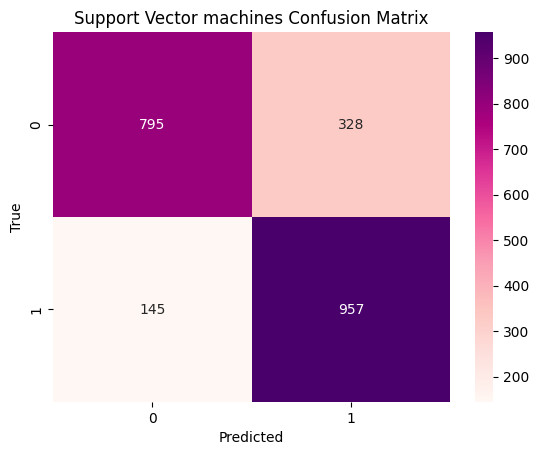

In [130]:
# compute the confusion matrix using true label values and predicted label values
svm_cm = confusion_matrix(y_test, svm_pred)

# plot the confusion matrix using seaborn heatmap
sns.heatmap(svm_cm, annot=True, fmt=".0f", cmap='RdPu')

plt.title("Support Vector machines Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [131]:
# Round the evaluation metrics to 3 decimal places
svm_acc = round(svm_acc, 3)
svm_prec = round(svm_prec, 3)
svm_rec = round(svm_rec, 3)
svm_f1 = round(svm_f1, 3)
svm_f2 = round(svm_f2, 3)
svm_auc = round(svm_auc, 3)


# Support Vector Machines
svm_results_table = [
    ["Support Vector Machines", svm_acc, svm_prec, svm_rec, svm_f1, svm_f2, svm_auc],
]

# Define column headers
svm_headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score", "AUC"]

# Print the Support Vector Machines results table using tabulate
print(tabulate(svm_results_table, headers=svm_headers))

Model                      Accuracy    Precision    Recall    F1 Score    F2 Score    AUC
-----------------------  ----------  -----------  --------  ----------  ----------  -----
Support Vector Machines       0.787        0.745     0.868       0.802       0.841  0.788


### **Models comparison & Model Selection**

In [132]:
# Create a table to compare the evaluation results
model_results_table = pd.DataFrame({'Model': ['Decision Tree', 'Gradient Boosting', 'Logistic Regression', 
                                        'Stochastic Gradient Descent', 
                                        'K-Nearest Neighbours', 'Random Forest', 'Support Vector Machines'],
                              'Accuracy': [dt_acc, gb_acc, lr_acc, sgd_acc, knn_acc, rf_acc, svm_acc],
                              'Precision': [dt_prec, gb_prec, lr_prec, sgd_prec, knn_prec, rf_prec, svm_prec],
                              'Recall': [dt_rec, gb_rec, lr_rec, sgd_rec, knn_rec, rf_rec, svm_rec],
                              'F1 Score': [dt_f1, gb_f1, lr_f1, sgd_f1, knn_f1, rf_f1, svm_f1],
                              'F2 Score': [dt_f2, gb_f2, lr_f2, sgd_f2, knn_f2, rf_f2, svm_f2],
                              'AUC': [dt_auc, gb_auc, lr_auc, sgd_auc, knn_auc, rf_auc, svm_auc]})


# Sort by Accuracy and F1_Score in descending order
sorted_table = model_results_table.sort_values(by=['Accuracy', 'F1 Score'], ascending=False)

sorted_table

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score,AUC
5,Random Forest,0.880,0.829,0.956,0.888,0.927,0.881
0,Decision Tree,0.844,0.793,0.926,0.855,0.896,0.845
6,Support Vector Machines,0.787,0.745,0.868,0.802,0.841,0.788
1,Gradient Boosting,0.783,0.747,0.849,0.795,0.827,0.784
4,K-Nearest Neighbours,0.770,0.722,0.872,0.790,0.837,0.771
3,Stochastic Gradient Descent,0.769,0.735,0.834,0.781,0.812,0.769
2,Logistic Regression,0.767,0.738,0.820,0.777,0.802,0.767


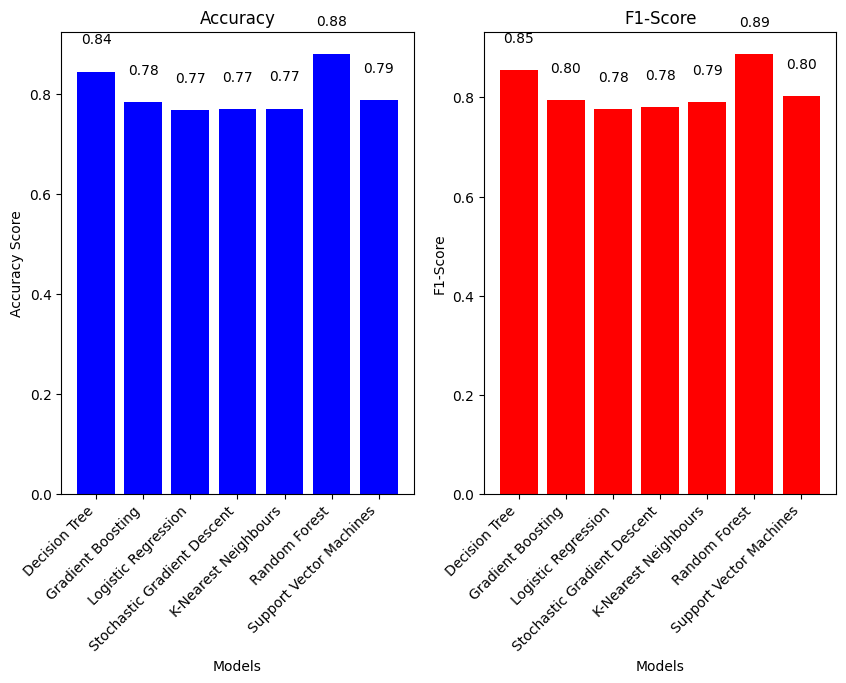

In [133]:
# Define the data for visualizing results
results_model_names = ['Decision Tree', 'Gradient Boosting', 'Logistic Regression', 'Stochastic Gradient Descent', 'K-Nearest Neighbours', 'Random Forest', 'Support Vector Machines']
Accuracy = [dt_acc, gb_acc, lr_acc, sgd_acc, knn_acc, rf_acc, svm_acc]
F1_Score = [dt_f1, gb_f1, lr_f1, sgd_f1, knn_f1, rf_f1, svm_f1]

# Set the figure size
plt.figure(figsize=(10,6))

# Create a bar chart for Accuracy
plt.subplot(1,2,1)
bars = plt.bar(results_model_names, Accuracy, color='blue')
plt.title('Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45, ha='right')

# Add data labels to the Accuracy bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, f"{Accuracy[i]:.2f}", ha='center', va='bottom')

# Create a bar chart for F1-Score
plt.subplot(1,2,2)
bars = plt.bar(results_model_names, F1_Score, color='red')
plt.title('F1-Score')
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.xticks(rotation=45, ha='right')

# Add data labels to the F1-Score bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, f"{F1_Score[i]:.2f}", ha='center', va='bottom')

# Show the plot
plt.show()

#### Comment:

We can see from the Accuracy and F1 score that the Random Forest had the highest Score. So we'll pick that, tune the hyperparameters, and retrain it with the best parameters for the best results.

### **Cross Validation for all Models**

#### **1. Decision Tree model**

In [134]:
# Set the number of folds for cross-validation
dt_k = 5

# Initialize a k-fold cross-validation object
kf = KFold(n_splits=dt_k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
score = cross_val_score(dt_model, X_train, y_train, cv=kf, scoring='f1')

# Calculate the mean and standard deviation of the cross-validation scores
dt_cv_score_mean = np.mean(score)
dt_cv_score_std = np.std(score)

# Print the results
print('Cross-validation f1 scores: {}'.format(score))
print('Average f1 score for all folds: {:.3f}'.format(dt_cv_score_mean))
print('Standard deviation of f1 scores: {:.3f}'.format(dt_cv_score_std))

Cross-validation f1 scores: [0.84560144 0.8644222  0.83090909 0.83695652 0.85587975]
Average f1 score for all folds: 0.847
Standard deviation of f1 scores: 0.012


### **2. Gradient Boosting model**

In [135]:
# Set the number of folds for cross-validation
gb_k = 5

# Initialize a k-fold cross-validation object
kf = KFold(n_splits=gb_k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
score = cross_val_score(gb_model, X_train, y_train, cv=kf, scoring='f1')

# Calculate the mean and standard deviation of the cross-validation scores
gb_cv_score_mean = np.mean(score)
gb_cv_score_std = np.std(score)

# Print the results
print('Cross-validation f1 scores: {}'.format(score))
print('Average f1 score for all folds: {:.3f}'.format(gb_cv_score_mean))
print('Standard deviation of f1 scores: {:.3f}'.format(gb_cv_score_std))

Cross-validation f1 scores: [0.79676259 0.79925651 0.78976234 0.78413284 0.82542525]
Average f1 score for all folds: 0.799
Standard deviation of f1 scores: 0.014



### **3. Logistic regresion**

In [136]:
# Set the number of folds for cross-validation
lr_k = 5

# Initialize a k-fold cross-validation object
kf = KFold(n_splits=lr_k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
score = cross_val_score(lr_model, X_train, y_train, cv=kf, scoring='f1')

# Calculate the mean and standard deviation of the cross-validation scores
lr_cv_score_mean = np.mean(score)
lr_cv_score_std = np.std(score)

# Print the results
print('Cross-validation f1 scores: {}'.format(score))
print('Average f1 score for all folds: {:.3f}'.format(lr_cv_score_mean))
print('Standard deviation of f1 scores: {:.3f}'.format(lr_cv_score_std))

Cross-validation f1 scores: [0.77355072 0.77953488 0.76497696 0.7679558  0.78754579]
Average f1 score for all folds: 0.775
Standard deviation of f1 scores: 0.008


### **4. Stochastic Gradient Descent**

In [137]:
# Set the number of folds for cross-validation
sgd_k = 5

# Initialize a k-fold cross-validation object
kf = KFold(n_splits=sgd_k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
score = cross_val_score(sgd_model, X_train, y_train, cv=kf, scoring='f1')

# Calculate the mean and standard deviation of the cross-validation scores
sgd_cv_score_mean = np.mean(score)
sgd_cv_score_std = np.std(score)

# Print the results
print('Cross-validation f1 scores: {}'.format(score))
print('Average f1 score for all folds: {:.3f}'.format(sgd_cv_score_mean))
print('Standard deviation of f1 scores: {:.3f}'.format(sgd_cv_score_std))

Cross-validation f1 scores: [0.70649895 0.77578051 0.76853526 0.7545717  0.73989637]
Average f1 score for all folds: 0.749
Standard deviation of f1 scores: 0.025


### **5. K-Nearest Neighbours**

In [138]:
# Set the number of folds for cross-validation
knn_k = 5

# Initialize a k-fold cross-validation object
kf = KFold(n_splits=knn_k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
score = cross_val_score(knn_model, X_train, y_train, cv=kf, scoring='f1')

# Calculate the mean and standard deviation of the cross-validation scores
knn_cv_score_mean = np.mean(score)
knn_cv_score_std = np.std(score)

# Print the results
print('Cross-validation f1 scores: {}'.format(score))
print('Average f1 score for all folds: {:.3f}'.format(knn_cv_score_mean))
print('Standard deviation of f1 scores: {:.3f}'.format(knn_cv_score_std))

Cross-validation f1 scores: [0.76695652 0.78659612 0.76666667 0.7780725  0.79122807]
Average f1 score for all folds: 0.778
Standard deviation of f1 scores: 0.010


### **6. Random Forest Model**

In [139]:
# Set the number of folds for cross-validation
rf_k = 5

# Initialize a k-fold cross-validation object
kf = KFold(n_splits=rf_k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
score = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='f1')

# Calculate the mean and standard deviation of the cross-validation scores
rf_cv_score_mean = np.mean(score)
rf_cv_score_std = np.std(score)

# Print the results
print('Cross-validation f1 scores: {}'.format(score))
print('Average f1 score for all folds: {:.3f}'.format(rf_cv_score_mean))
print('Standard deviation of f1 scores: {:.3f}'.format(rf_cv_score_std))

Cross-validation f1 scores: [0.86330935 0.87648673 0.86187845 0.87318841 0.88372093]
Average f1 score for all folds: 0.872
Standard deviation of f1 scores: 0.008


### **7. Support Vector machines**

In [140]:
# Set the number of folds for cross-validation
svm_k = 5

# Initialize a k-fold cross-validation object
kf = KFold(n_splits=svm_k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
score = cross_val_score(svm_model, X_train, y_train, cv=kf, scoring='f1')

# Calculate the mean and standard deviation of the cross-validation scores
svm_cv_score_mean = np.mean(score)
svm_cv_score_std = np.std(score)

# Print the results
print('Cross-validation f1 scores: {}'.format(score))
print('Average f1 score for all folds: {:.3f}'.format(svm_cv_score_mean))
print('Standard deviation of f1 scores: {:.3f}'.format(svm_cv_score_std))

Cross-validation f1 scores: [0.78061674 0.79057117 0.78150499 0.79891794 0.80935252]
Average f1 score for all folds: 0.792
Standard deviation of f1 scores: 0.011


In [141]:
# Create a table to compare the evaluation results
cv_results_table = pd.DataFrame({'Model': ['Decision Tree', 'Gradient Boosting', 'Logistic Regression', 
                                        'Stochastic Gradient Descent', 
                                        'K-Nearest Neighbours', 'Random Forest', 'Support Vector Machines'],
                              'Average Cross Validation F1 Scores': [dt_cv_score_mean, 
                                                                     gb_cv_score_mean, 
                                                                     lr_cv_score_mean, 
                                                                     sgd_cv_score_mean, 
                                                                     knn_cv_score_mean, 
                                                                     rf_cv_score_mean, 
                                                                     svm_cv_score_mean],
                              'Standard Deviation for Cross Validation': [dt_cv_score_std, 
                                                                          gb_cv_score_std, 
                                                                          lr_cv_score_std, 
                                                                          sgd_cv_score_std, 
                                                                          knn_cv_score_std, 
                                                                          rf_cv_score_std, 
                                                                          svm_cv_score_std]})


# Sort by Accuracy and F1_Score in descending order
sorted_cv_table = cv_results_table.sort_values(by=['Average Cross Validation F1 Scores',], ascending=False)

sorted_cv_table


,Model,Average Cross Validation F1 Scores,Standard Deviation for Cross Validation
5,Random Forest,0.871717,0.008204
0,Decision Tree,0.846754,0.012197
1,Gradient Boosting,0.799068,0.014211
6,Support Vector Machines,0.792193,0.010868
4,K-Nearest Neighbours,0.777904,0.009992
2,Logistic Regression,0.774713,0.008121
3,Stochastic Gradient Descent,0.749057,0.024573


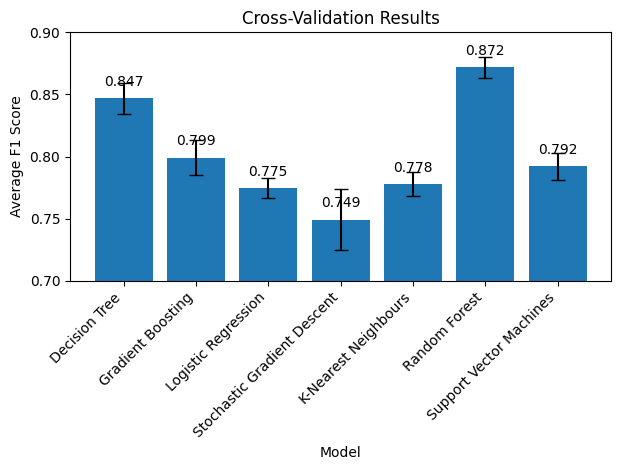

In [142]:
# define the data for visualizing results
model_names = ['Decision Tree', 'Gradient Boosting', 'Logistic Regression', 'Stochastic Gradient Descent', 'K-Nearest Neighbours', 'Random Forest', 'Support Vector Machines']
f1_scores = [dt_cv_score_mean, gb_cv_score_mean, lr_cv_score_mean, sgd_cv_score_mean, knn_cv_score_mean, rf_cv_score_mean, svm_cv_score_mean]
std_devs = [dt_cv_score_std, gb_cv_score_std, lr_cv_score_std, sgd_cv_score_std, knn_cv_score_std, rf_cv_score_std, svm_cv_score_std]

# create the bar chart

fig, ax = plt.subplots()
ax.bar(model_names, f1_scores, yerr=std_devs, capsize=5)

# Add data labels to the bars
for i, score in enumerate(f1_scores):
    ax.text(i, score + 0.01, '{:.3f}'.format(score), ha='center')

ax.set_xlabel('Model')
ax.set_ylabel('Average F1 Score')
ax.set_ylim([0.7, 0.9])
ax.set_title('Cross-Validation Results')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Comment:

After the K Fold cross validation scores, the average cross validation F1 scores depicts the Random Forest Model is the best model.

Cross Validation was the to assess our models by training several models on various subsets of the input data. It is also used as a technique to identify over fitting in the models. This indicates that the model is not successfully generalizing the patterns and similarities in the new inputted data.

### **Hyperparameters tuning**
Fine-tune the Top-k models (3 < k < 5) using a  GridSearchCV (that is in sklearn.model_selection ) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

### **Hyperparameters tuning - Random Forest (Best Model)**

In [143]:
# Define the model
rfc = RandomForestClassifier(random_state=42)

In [144]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [145]:


# Define the search strategy and perform the search
rfc_p = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1)
rfc_p.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]})

In [146]:
# Print the best hyperparameters and their corresponding score
best_params = rfc_p.best_params_
best_score = round(rfc_p.best_score_, 3)
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

Best parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.788


In [147]:
# Evaluate the model on the testing set using the best hyperparameters
best_rfc = rfc_p.best_estimator_
test_score = round(best_rfc.score(X_test, y_test), 3)
print(f"Test score: {test_score}")

Test score: 0.796


In [148]:
def display(results):
    print("Best parameters are: ", results.best_params_)
    print("\n")
    
    mean_scores = results.cv_results_['mean_test_score']
    std_scores = results.cv_results_['std_test_score']
    param_sets = results.cv_results_['params']
    
    for mean_score, std_score, param_set in zip(mean_scores, std_scores, param_sets):
        print(f"{round(mean_score, 3)} (+/- {round(std_score * 2, 3)}) for {param_set}")

In [149]:
# display the results
display(rfc_p)

Best parameters are:  {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


0.753 (+/- 0.016) for {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.755 (+/- 0.019) for {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
0.755 (+/- 0.016) for {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
0.753 (+/- 0.016) for {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
0.755 (+/- 0.019) for {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
0.755 (+/- 0.016) for {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}
0.753 (+/- 0.016) for {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
0.755 (+/- 0.019) for {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}
0.755 (+/- 0.016) for {'max_dep

### **Hyperparameters tuning - Decision Tree (2nd Best Model)**

In [150]:
# Define parameter grid
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [151]:
# Initialize decision tree classifier
dtc = DecisionTreeClassifier()

In [152]:
# Initialize grid search
dtc_p = GridSearchCV(estimator = dtc, param_grid = dt_param_grid, cv = 5)

# Fit grid search to data
dtc_p.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [153]:
# Print best parameters and score
print("Best parameters: {}".format(dtc_p.best_params_))
print(f"Best score: {round(dtc_p.best_score_, 3)}")

Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.834


### **Hyperparameters tuning - Gradient Boosting (3rd Best Model**

In [154]:


# Define the model
gbc = GradientBoostingRegressor()


In [155]:
# Define the hyperparameters to be tuned
gb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6],
    'learning_rate': [0.01, 0.1, 1],
    'subsample': [0.5, 0.7, 1.0],
    'min_samples_leaf': [1, 2, 4]
}

In [156]:
# Use GridSearchCV to find the best hyperparameters
gbc_p = GridSearchCV(gbc, gb_params, cv=5, n_jobs=-1)
gbc_p.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [2, 4, 6], 'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.5, 0.7, 1.0]})

In [157]:
# Print the best hyperparameters found
print(gbc_p.best_params_)
print(f"Best score: {round(gbc_p.best_score_, 3)}")

{'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 1, 'n_estimators': 200, 'subsample': 0.7}
Best score: 0.538


### **Conclusion**
This project offers an extensive examination of customer churn prediction and retention strategies within a telecommunications company. Among the models scrutinized, it is evident that the Random Forest Model effectively forecasts customer churn outcomes. To be specific, the model yields an average cross-validation accuracy of around 87% based on the K-Fold Cross Validation conducted.

#### **Key insights:**

- **Feature Engineering and Selection:** These are crucial steps in machine learning projects and can greatly impact model performance.
Algorithm Selection and Hyperparameter Tuning: Choosing the appropriate machine learning algorithm and optimizing hyperparameters can substantially enhance model accuracy.
- **Preprocessing Steps:** Tasks like scaling and encoding categorical variables are vital for many machine learning models to function effectively.
- **Handling Class Imbalance:** Addressing class imbalance is crucial for classification tasks as it can influence model performance and introduce bias into the results.
- **Interpreting Model Results and Performance Evaluation:** Evaluating performance metrics and interpreting model results are essential for assessing a model's effectiveness and its suitability for real-world applications.
- **Challenges with Real-world Datasets:** Dealing with real-world datasets often involves handling missing or incomplete data, outliers, and other issues, requiring careful consideration and appropriate handling techniques.
- **Real-world Applications of Machine Learning:** Machine learning has significant real-world applications, such as predicting customer behavior or detecting fraud, and can provide valuable insights to support decision-making processes.

 #### **Challenges faced:**

**Dealing with Imbalanced Data:** The dataset exhibited class imbalance, making it challenging for the model to learn the minority class. Techniques like upsampling, downsampling, and using class weights were employed to address this issue.

**Feature Engineering:** Determining which features to use and how to transform them to enhance model performance posed a challenge. Feature engineering is crucial in improving model accuracy but requires careful consideration and experimentation.

**Hyperparameter Tuning:** Finding the optimal hyperparameters for the machine learning model was a time-consuming and iterative process. Techniques like grid search and cross-validation were employed to identify the best hyperparameters, but it still required significant effort.

**Model Evaluation:** The analysis primarily relied on a single evaluation metric (accuracy) to assess model performance. Utilizing multiple metrics (e.g., precision, recall, and F1-score) would provide a more comprehensive understanding of the model's effectiveness.

**Retention Strategies:** Providing detailed recommendations for retention strategies to mitigate customer churn was challenging due to the limitations of analyzing a single dataset. However, exploring and suggesting specific retention strategies for the telecommunications company could help reduce churn rates effectively.

  #### **Way Forward**
**Collect more data:** The dataset used in this project is relatively small, and collecting more data could improve the model's performance and make it more robust.

**Feature engineering:** More feature engineering could be done to create new features that may improve the model's performance. For example, adding interaction terms or polynomial terms to existing features, or creating new features based on domain knowledge.

**Hyperparameter tuning:** There is still room for improvement in the model's performance by further optimizing the hyperparameters of the Gradient Boosting Classifier.

**Deploy the model:** After the model is finalized, it can be deployed in a production environment, for example, as a web application or integrated into a larger software system.

**Monitor and update the model:** Once the model is deployed, it is important to monitor its performance and update it regularly with new data to ensure it remains accurate and effective.

**Data Cleaning and Feature Engineering:** Data cleaning and feature engineering are crucial steps in any data analysis project. However, the analysis performed feature selection using the Random Forest feature importance method, but it is important to try other feature selection methods as well to ensure the most important features are selected for the model.

=======================================